<center>
    <div style="display: flex; align-items: center; justify-content: center;">
        <div style="flex: 1;">
            <img src="https://podgoodies.iitmadrasonline.in/cdn/shop/files/pod_logo_1.png?v=1628763162" alt="Image" width="400" style="margin-top: 20px;"/>
        </div>
        <div style="flex: 1; text-align: left; padding-left: 20px;">
            <font size="3">॥ जय मां सरस्वती ॥</font><br>
            <font size="6"><b>MLP Project (Jan 2024)</b></font><br>
            <font size="4"><u>Recipe for Rating: Predict Food Ratings using ML</u></font><br>
            <font size="2"><b>Submitted by -</b></font><br>
            Tushar Sharma<br>
            Roll Number - 21f3000007<br>
            Kaggle Username - tushar5harma
        </div>
    </div>
</center>

## Project Overview
In this project our goal is to build models that can guess the ratings for each recipe using given information.

## Dataset Overview
This dataset is your gateway to the Recipe Ratings Prediction Challenge! Each entry captures a unique culinary story with details such as recipe names, user reviews, and various key features. Your task is to explore this rich data and develop predictive models that can forecast the ratings for every recipe. Unleash your creativity and analytical skills to unlock the secrets hidden in the world of flavors!

## Data Files
The dataset is composed of the following files:

- **train.csv**: The training set, which includes the target variable 'rating' and accompanying feature attributes.

- **test.csv**: The test set, containing similar feature attributes but without the target variable 'rating' , as it is the variable to be predicted.

- **sample.csv**: A sample submission file provided in the correct format for competition submissions.

## Columns Description
1. **RecipeNumber**: Placement of the recipe on the top 100 recipes list
2. **RecipeCode**: Unique ID of the recipe used by the site
3. **RecipeName**: Name of the recipe the comment was posted on
4. **CommentID**: Unique ID of the comment
5. **UserID**: Unique ID of the user who left the comment
5. **UserName**: Name of the user
7. **UserReputation**: Internal score of the site, roughly quantifying the past behavior of the user
8. **CreationTimestamp**: Time at which the comment was posted as a Unix timestamp
9. **ReplyCount**: Number of replies to the comment
10. **ThumbsUpCount**: Number of up-votes the comment has received
11. **ThumbsDownCount**: Number of down-votes the comment has received
12. **Rating**: The score on a 1 to 5 scale that the user gave to the recipe (Target Variable)
13. **BestScore**: Score of the comment, likely used by the site to help determine the order comments appear in
14. **Recipe_Review**: Text content of the comment

## Evaluation
Submissions are evaluated based on **Accuracy Score** -

$$\text{Accuracy Score} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \times 100$$

In [1]:
# ======== External Arguements/Parameters ======== #

class ARGS():
    train_path = '/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv'
    test_path = '/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv'
    sample_path = '/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv'
    output_path = '/kaggle/working/'
    seed = 42
    n_folds = 5
    train_split = 0.80
    val_split = 0.20

In [2]:
# ============= Important Libraries ============= #

# Kernel Runtime Management
import os
import sys
import warnings
if not sys.warnoptions:
    # To ignore warinings
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

# Data Processing
import pandas as pd

# Linear Algebra
import numpy as np

# Code Reproducibility
import random 
random.seed(ARGS.seed)
np.random.seed(ARGS.seed)

# ML/DL Libraries
import sklearn as sk
import xgboost as xgb
import lightgbm as lgb
from sklearn import neighbors, svm, linear_model, neural_network
from sklearn.dummy import DummyClassifier # For Baseline Model

# Performance Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

# Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config, compose, pipeline
set_config(display='diagram')
%matplotlib inline

# Pre-processing/Feature Engineering 
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PolynomialFeatures, RobustScaler

# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline


# Version Information
print('Library', '\t|', 'Version', '\n=========================')
print('Python ', '\t|', sys.version[:7])
nb_ver = !jupyter-notebook --version
print('Jupyter NB', '\t|', nb_ver[0])
print('Pandas ', '\t|', pd.__version__)
print('Numpy  ', '\t|', np.__version__)
print('Scikit-Learn', '\t|', sk.__version__)
print('XGBoost', '\t|', xgb.__version__)
print('LightGBM', '\t|', lgb.__version__)
print('Matplotlib', '\t|', mpl.__version__)
print('Seaborn', '\t|', sns.__version__)

Library 	| Version 
Python  	| 3.10.13
Jupyter NB 	| 6.5.6
Pandas  	| 2.2.0
Numpy   	| 1.26.3
Scikit-Learn 	| 1.2.2
XGBoost 	| 2.0.3
LightGBM 	| 4.2.0
Matplotlib 	| 3.7.4
Seaborn 	| 0.12.2


In [3]:
# Loading training & testing data
train_df = pd.read_csv(ARGS.train_path, low_memory = False)
test_df = pd.read_csv(ARGS.test_path, low_memory = False)
sample = pd.read_csv(ARGS.sample_path, low_memory = False)

print('Traing Data Shape\t', train_df.shape)
print('Testing Data Shape\t', test_df.shape)

Traing Data Shape	 (13636, 15)
Testing Data Shape	 (4546, 14)


In [4]:
# Random sample of Training data
train_df.sample(5)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
9931,208,14,7178,Zucchini Cupcake,sp_aUSaElGf_7178_c_260266,u_1oKZkZmjU6AQM5Txrapc7RFZ0uG,chrisboyce,1,1622717623,0,0,0,2,100,Not sure what everyone was so impressed with. ...
7481,73,56,27675,Peanut Butter Cup Cheesecake,sp_aUSaElGf_27675_c_136066,u_1oKVdtl3WjMbpxJDrB3itwzthpR,btakpowers,10,1622717022,0,0,0,5,100,Everyone loved this and I&#39;ve had requests ...
3289,229,8,6086,Apple Pie,sp_aUSaElGf_6086_c_227718,u_1oKXgLKTeeP8h167zRnJ06h4sFR,mtande4,1,1622717438,0,0,0,5,100,its awesome but my came out runny even though ...
13069,254,11,12003,Traditional Lasagna,sp_aUSaElGf_12003_c_128744,u_1oKVcYz2G9S6DtvP3vWYIZkSj0k,kafaughn,1,1622716977,0,0,0,5,100,"Delicious. I added chopped zucchini, green pe..."
8271,58,54,35766,Cheeseburger Paradise Soup,sp_aUSaElGf_35766_c_357314,u_1oKW2gzvlqs49DYvbqNv6u4X9OE,DeHamm1100,1,1622718122,0,0,0,5,100,Very hearty and filling. Great winter soup. M...


In [5]:
# Descriptive Statistics for Training Data
train_df.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [6]:
# Random sample of Testing data
test_df.sample(5)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
1406,56,16,41101,Rustic Italian Tortellini Soup,sp_aUSaElGf_41101_c_257606,u_1oKVbgrmGjQOHaR5q2Pk9okVniP,Remenec,1,1622717623,0,0,0,100,My whole family loved this soup! Such deliciou...
2984,173,18,2872,Stuffed Pepper Soup,sp_aUSaElGf_2872_c_163584,u_1oKXBzhP0nfrTvdUm4OmCsoDGwo,jtmeg,1,1622717156,0,0,0,100,I cut this recipe in half and added a can of t...
2955,337,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_195765,u_1oKXmmmKxzd1GPuelqz2Q8313fV,carrierlynn,1,1622717280,0,0,0,100,I made this last night for dinner and used red...
1075,477,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_229155,u_1oKZ7s3p4KldGhH3MOokfkX5DdP,rcrawls,1,1622717442,0,0,0,100,I&#39;ve made this chili several times. It&#3...
543,543,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_186235,u_1oKVaOPYCsTCPrimbiYIBsi4ixC,katlaydee3,20,1622717282,0,0,0,100,I loved this chili. I made the recipe exactly...


In [7]:
# Descriptive Statistics for Testing Data
test_df.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
count,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03,4546.000000,4546.000000,4546.000000,4546.000000
mean,122.605147,38.884294,21736.701936,2.157501,1.623702e+09,0.014958,1.062253,0.566212,153.264848
std,116.006955,30.129333,24211.777711,9.797366,5.542652e+06,0.139922,4.303231,4.021903,141.355650
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,12.000000
25%,46.000000,11.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,100.000000
50%,92.000000,32.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
75%,154.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
max,715.000000,100.000000,191775.000000,520.000000,1.665669e+09,3.000000,106.000000,122.000000,931.000000


In [8]:
# Checking for the Null Values from the dataset
print(pd.DataFrame({'Column': train_df.columns, 'Missing Values': train_df.isna().sum().values}))

# Removing Null Values in the Training dataset
train_df.dropna(inplace = True)

               Column  Missing Values
0                  ID               0
1        RecipeNumber               0
2          RecipeCode               0
3          RecipeName               0
4           CommentID               0
5              UserID               0
6            UserName               0
7      UserReputation               0
8   CreationTimestamp               0
9          ReplyCount               0
10      ThumbsUpCount               0
11    ThumbsDownCount               0
12             Rating               0
13          BestScore               0
14      Recipe_Review               2


In [9]:
print("Duplicates present in Training Dataset -", train_df['CommentID'].duplicated().sum())
print("Duplicates present in Testing Dataset -", test_df['CommentID'].duplicated().sum())

Duplicates present in Training Dataset - 0
Duplicates present in Testing Dataset - 0


In [10]:
# Selecting only numerical features from the dataset
numerical_feats = train_df.select_dtypes(include=['int64', 'float64'])
print('>> Skewness in Training Data\n')
display(train_df[numerical_feats.columns].skew())

>> Skewness in Training Data



ID                    2.145764
RecipeNumber          0.463407
RecipeCode            3.452008
UserReputation       33.149276
CreationTimestamp     5.447327
ReplyCount           11.407385
ThumbsUpCount         7.885576
ThumbsDownCount      16.658905
Rating               -2.128203
BestScore             3.392891
dtype: float64

# **Exploratory Data Analysis (EDA)**

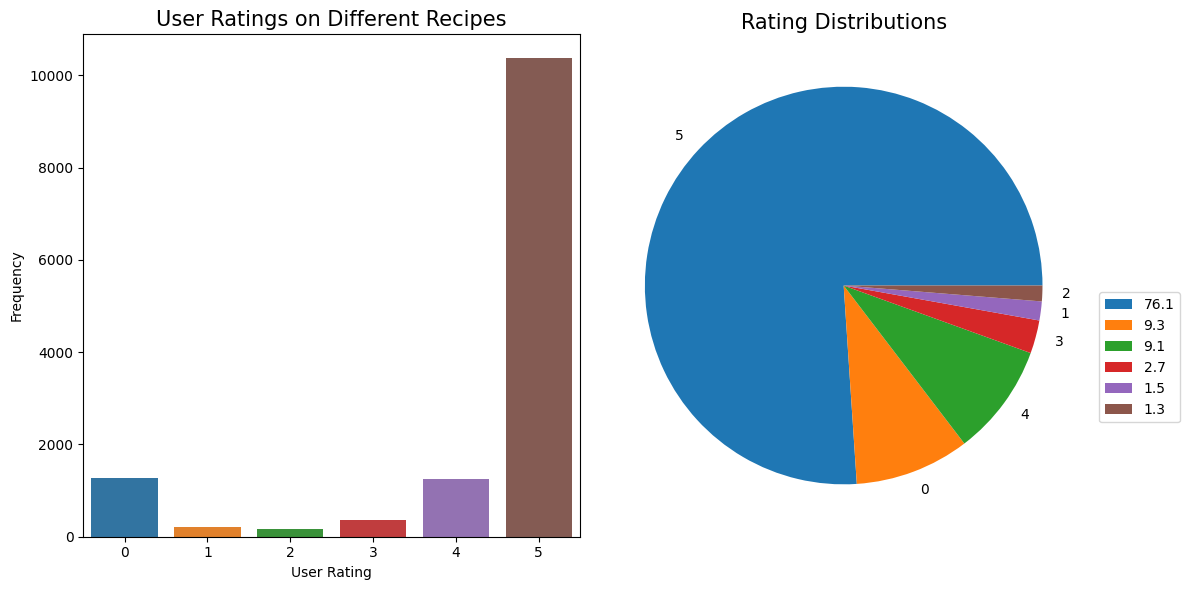

In [11]:
# Plotting the frequency of user ratings on different recipes using pie chart

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for rating distributions
ratings_counts = train_df['Rating'].value_counts()
sns.countplot(x='Rating', data=train_df, ax=axs[0])
axs[0].set_xlabel('User Rating')
axs[0].set_ylabel('Frequency')
axs[0].set_title('User Ratings on Different Recipes', fontsize=15)

# Pie chart for rating distributions
percentages = (ratings_counts.values * 100) / len(train_df)
percentages = [round(percentage, 1) for percentage in percentages]
ratings_counts.plot(kind='pie', autopct="", labels=ratings_counts.index, ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_title('Rating Distributions', fontsize=15)
plt.legend(labels=percentages, loc="best", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### **Plot-1 Inference**
1. From the above Bar Chart and Pie Chart we can easily deduce that the majority of the users who had given reviews on the given recipes have rated '5'.

2. Since 'Ratings' is our target column, this also reflects upon the great imbalance that we have in our dataset with being '5' as majority class and '2' being minority class.

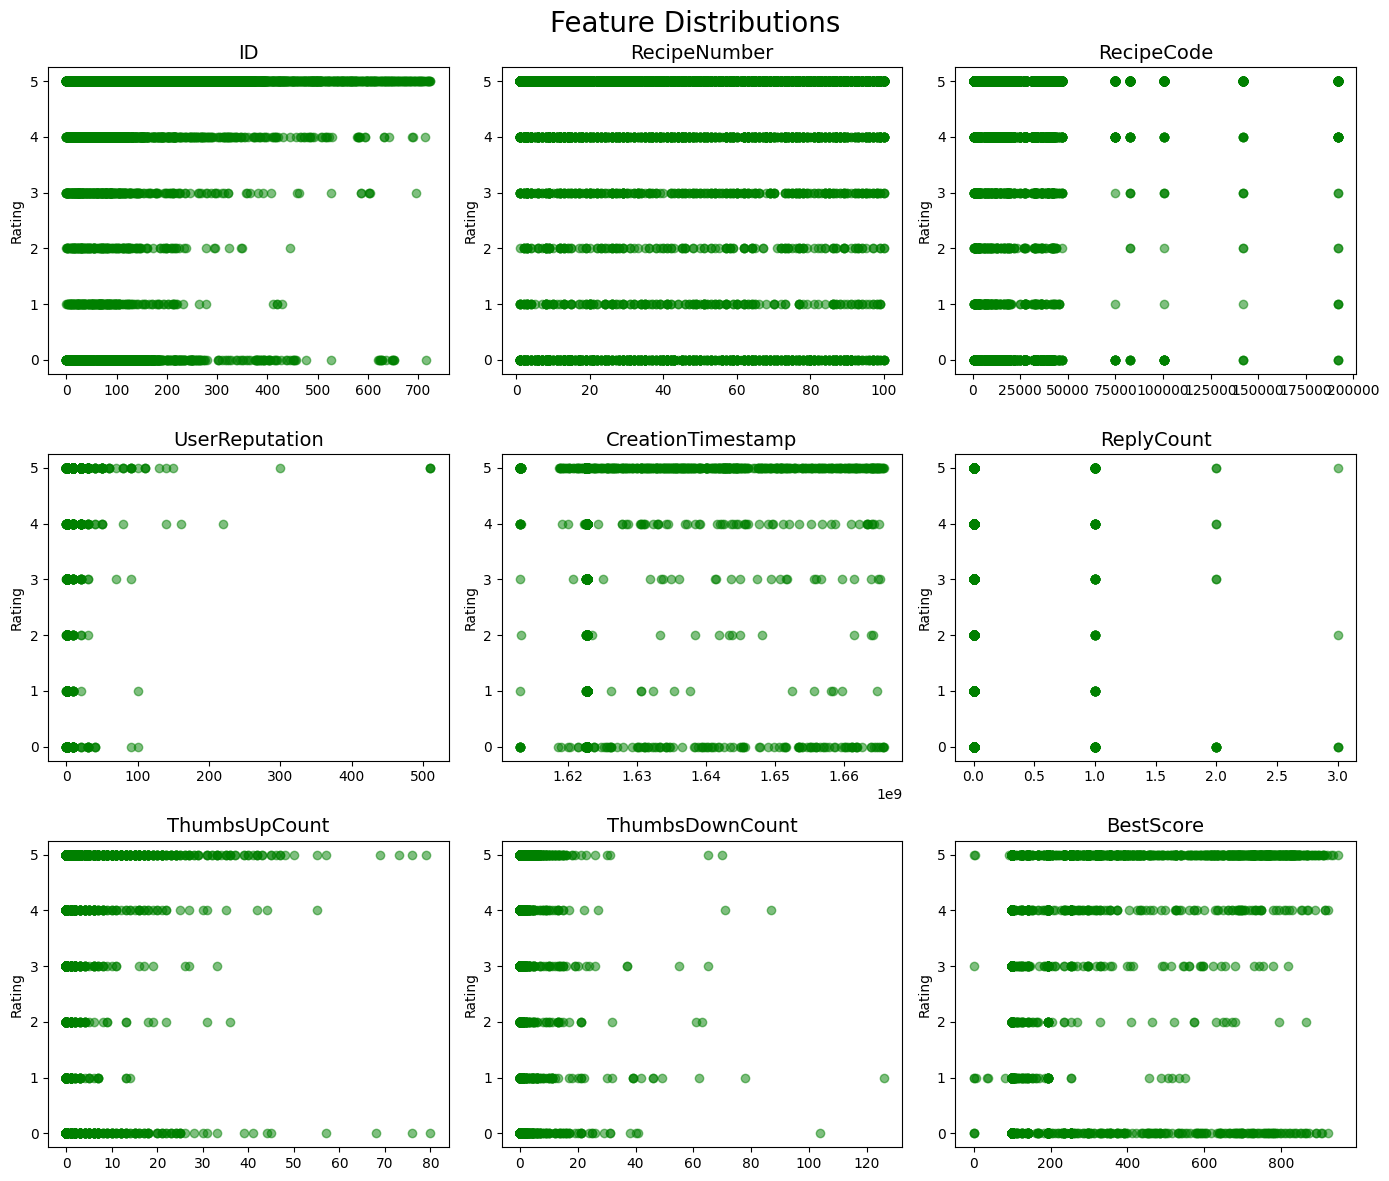

In [12]:
# Plotting the distribution of each numerical feature with the target variable

# Removing features that are not needed for this analysis
feat_f_dist_plot = train_df.drop(columns=['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review', 'Rating'])

# Plot scatter plots for each feature
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('Feature Distributions', fontsize=20)

for i, feature in enumerate(feat_f_dist_plot.columns):
    row, col = divmod(i, 3)
    current_ax = axes[row, col]

    # Plot scatter plot for each feature
    current_ax.scatter(feat_f_dist_plot[feature], train_df['Rating'],c= 'green', alpha=0.5)
    current_ax.set_title(feature, fontsize=14)
    current_ax.set_xlabel(None)
    current_ax.set_ylabel("Rating")
plt.tight_layout()
plt.show()

### **Plot-2 Inference**
1. There is a positive correlation between thumbs up count and recipe score. This means that recipes with higher ratings have also received more thumbs up ratings.

2. It appears that users with higher reputations tend to have a higher proportion of '5' ratings and a lower proportion of '1' ratings. This suggests that users with good reputations are generally well-received and provides geniune reviews.

3. The recipes with higher 'BestScore' are generally rated '5' by the other users.

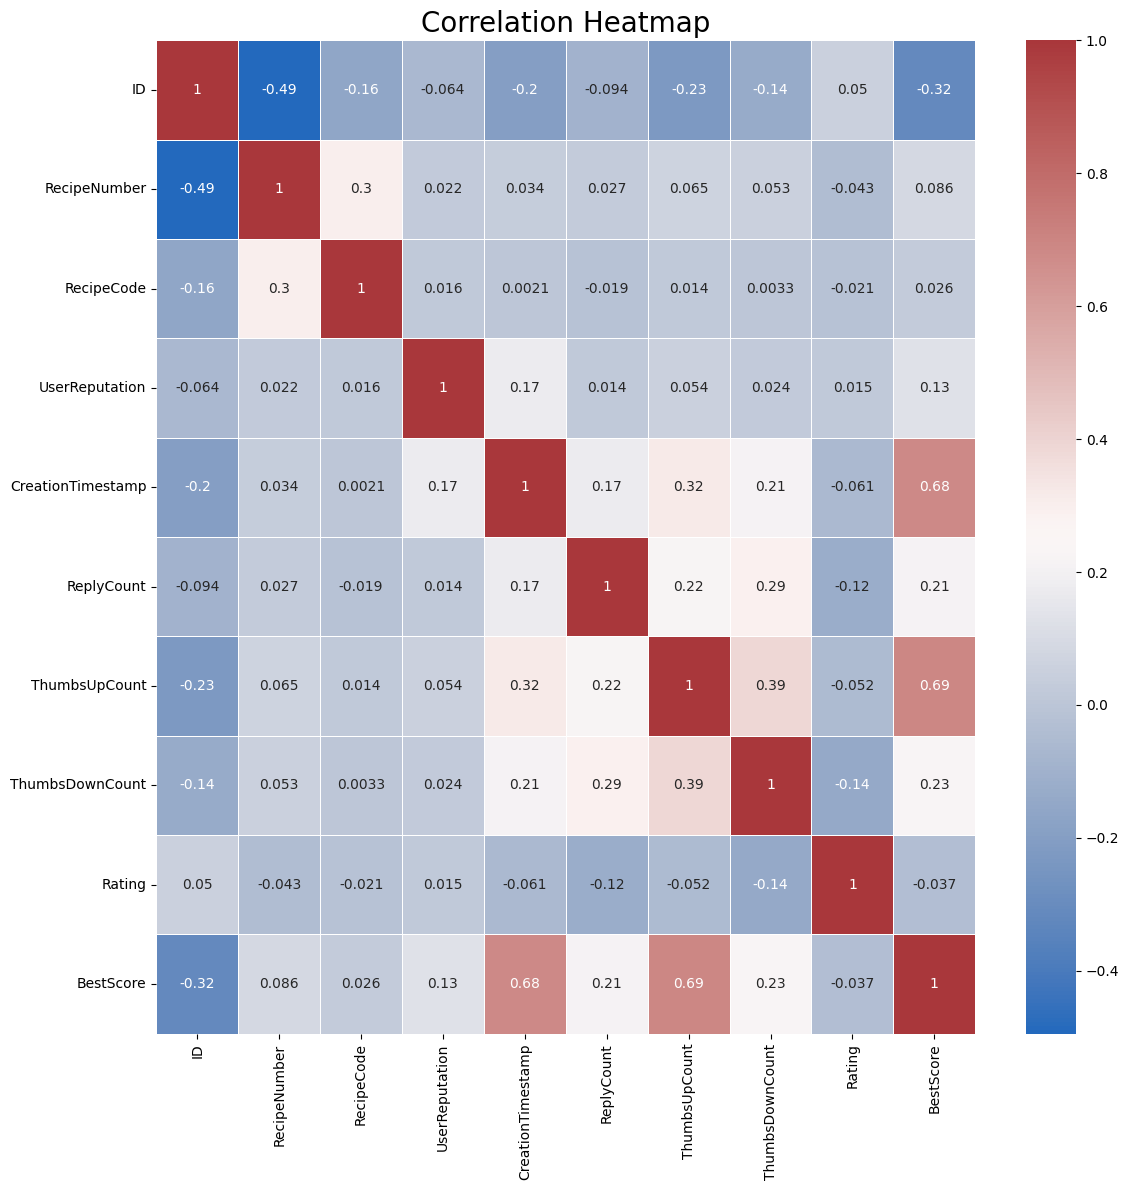

In [13]:
# Plotting the correlation heatmap of numerical features for checking multicollinearity

# Calculating the correlation matrix
correlation_matrix = numerical_feats.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

### **Plot-3 Inference**

1. There is a positive correlation between 'ThumbsUpCount' and 'Rating', and a negative correlation between 'ThumbsDownCount' and 'Rating'. This means recipes with more thumbs up tend to have higher ratings, and vice versa.

2. There is a positive correlation between 'ReplyCount' and ThumbsUpCount / ThumbsDownCount. This suggests that recipes that generate more discussion or engagement also tend to get more thumbs up/down votes, possibly because they are more interesting or controversial.

3. Creation timestamp has a weak correlation with most other factors.

> Overall, the heatmap suggests that user engagement (ThumbsUpCount, ThumbsDownCount and ReplyCount) is a good indicator of a recipe's popularity and rating

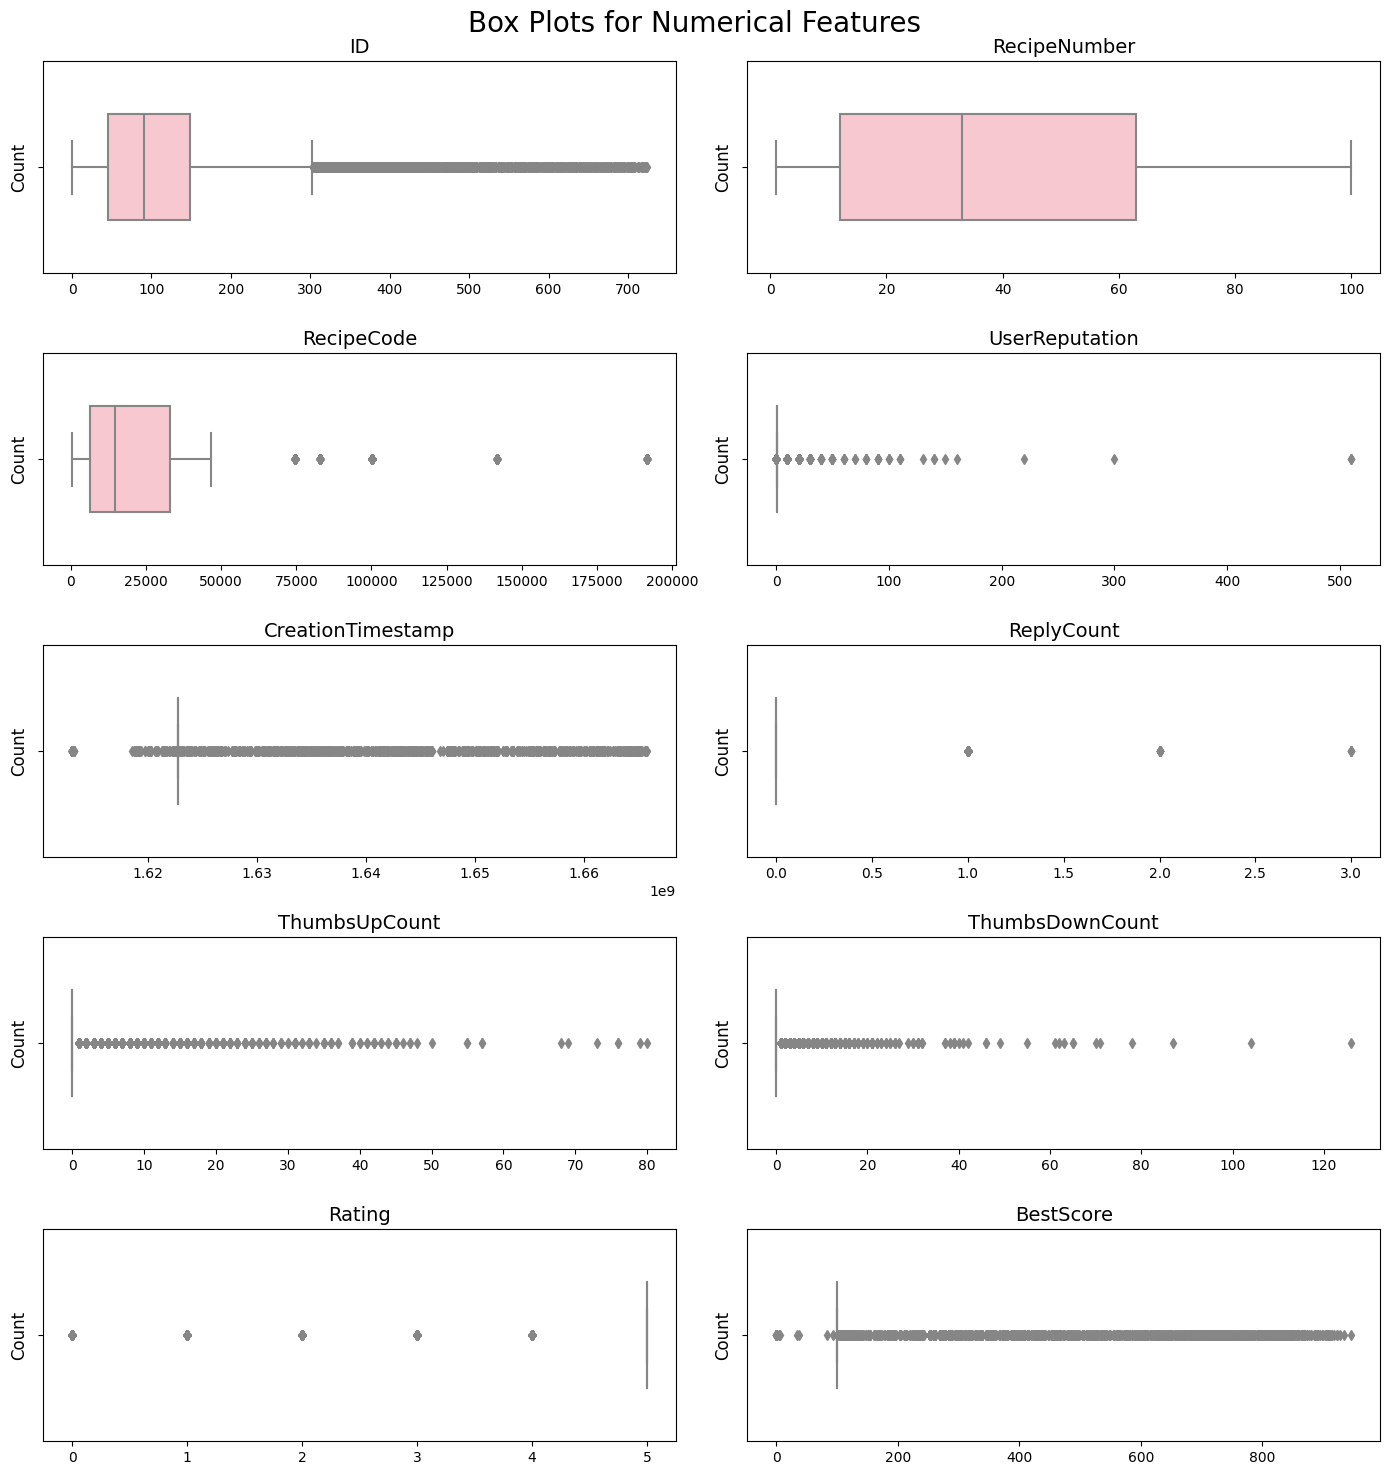

In [14]:
# Plotting the box plots for numerical features to check for outliers

# Set up subplots for box plots
fig, axes = plt.subplots(5, 2, figsize=(14, 15))
axes = axes.ravel()

# Plotting box plots for each numerical feature
for i, column in enumerate(numerical_feats):
    sns.boxplot(x=column, data=train_df, color='pink', width=0.5, fliersize=5, ax=axes[i])
    axes[i].set_title(f'{column}', fontsize=14)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Count', fontsize=12)
plt.suptitle('Box Plots for Numerical Features', fontsize=20)
plt.tight_layout()
plt.show()

### **Plot-4 Inference**
- The data exhibits a high prevalence of outliers across most features.
- This suggests a potential issue where a single, dominant data point exists in each column, influencing the distribution and causing the box plots to appear as thin lines. 
- This dominant point may represent a common value that is present in a significant portion of the data, overshadowing the remaining data points. Hence making points with slight variance appear as outlier.

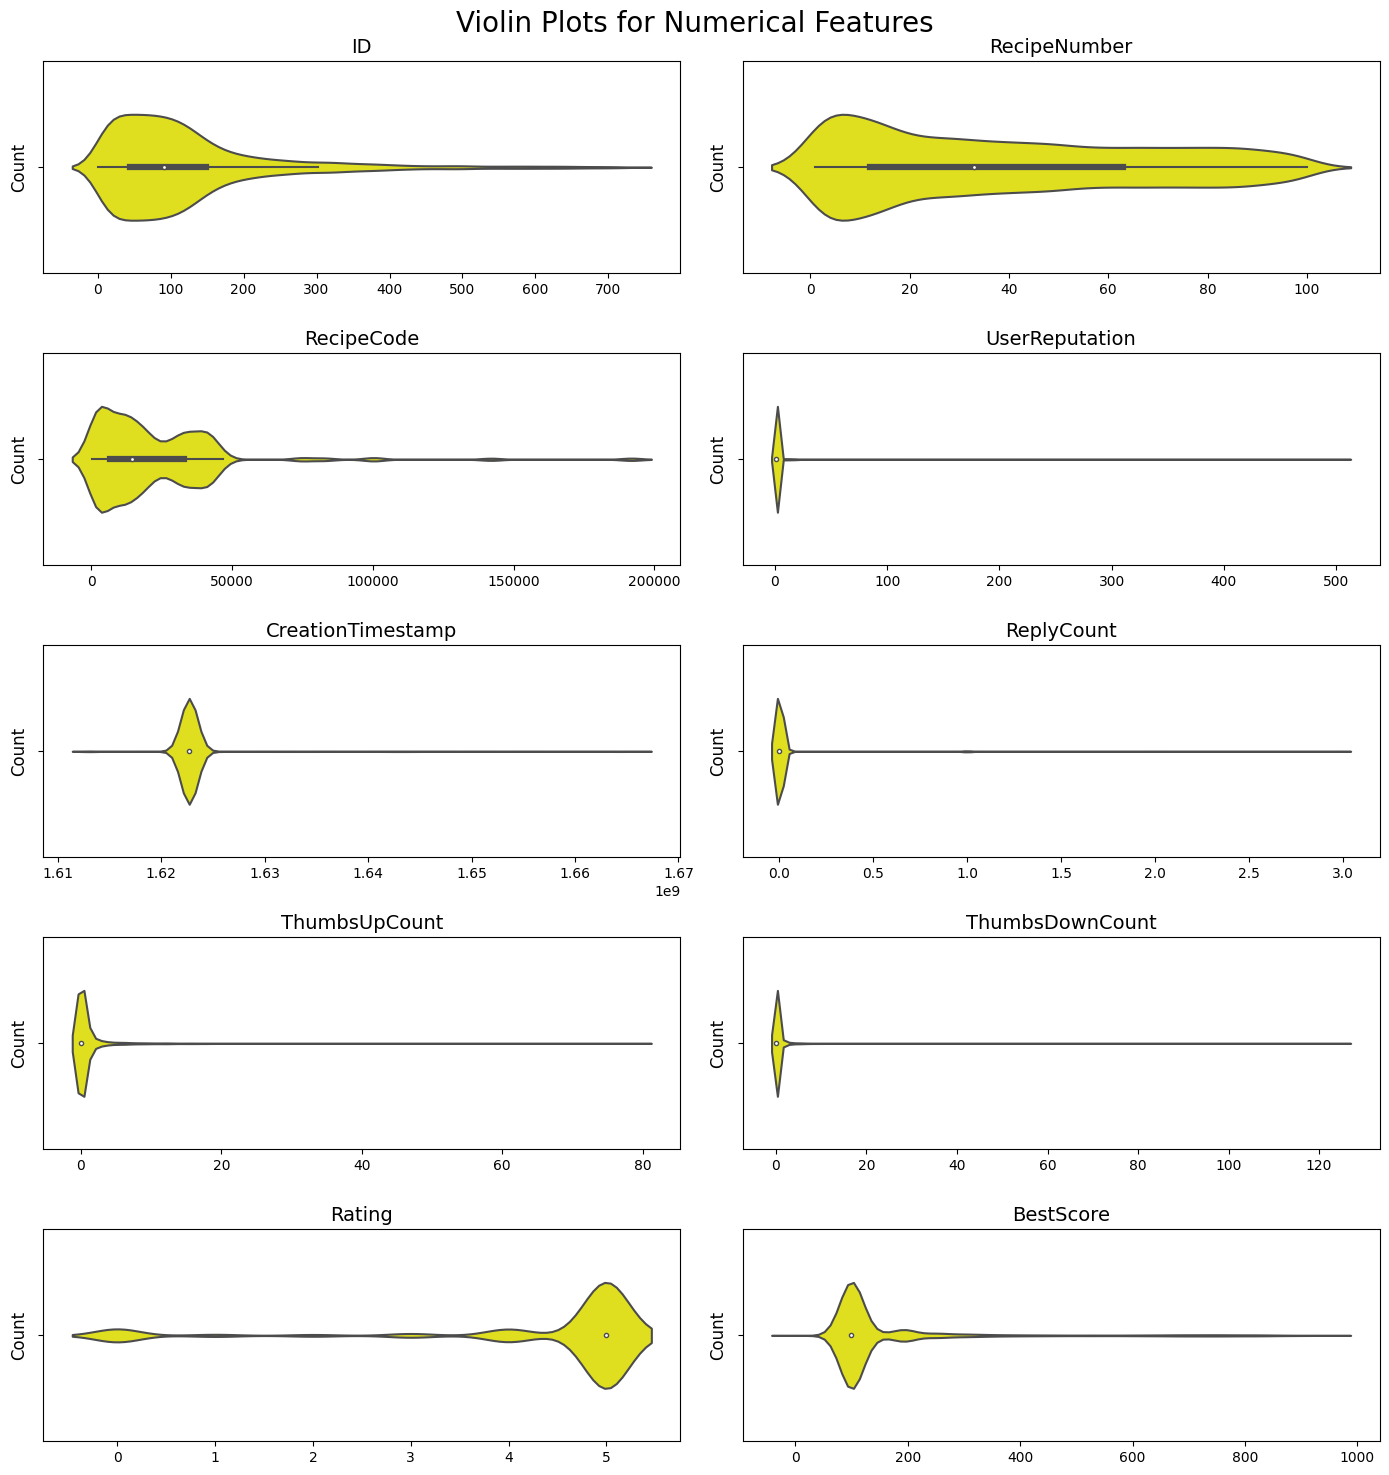

In [15]:
# Plotting the violin plots for numerical features to show the distribution of data

# Set up subplots for box plots
fig, axes = plt.subplots(5, 2, figsize=(14, 15))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Iterate through numeric columns and create box plots
for i, column in enumerate(numerical_feats):
    sns.violinplot(x=column, data=train_df, color='yellow', width=0.5, fliersize=5, ax=axes[i])
    axes[i].set_title(f'{column}', fontsize=14)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Count', fontsize=12)
plt.suptitle('Violin Plots for Numerical Features', fontsize=20)
plt.tight_layout()
plt.show()

### **Plot-5 Inference**
Both the box plots and violin plots suggest a potential issue with dominant data points across most features. This dominance likely masks the underlying distribution of the data, making it difficult to analyze the density (shape) of each column using violin plots.

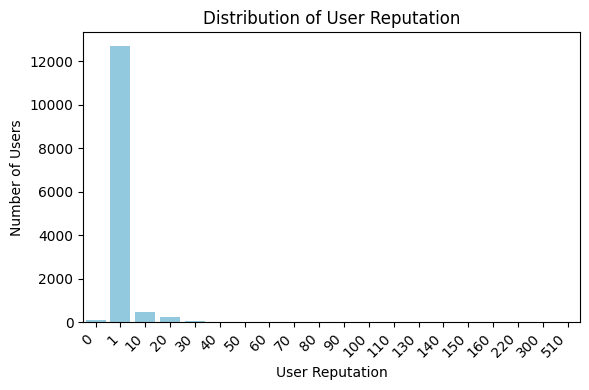

In [16]:
user_reputation_counts = train_df['UserReputation'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=user_reputation_counts.index, y=user_reputation_counts.values, color='skyblue')
plt.title('Distribution of User Reputation')
plt.xlabel('User Reputation')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Plot-6 Inference**
- We have plotted this graph gain deeper insights from the box and violin plots and for that we examined the distribution of the "UserReputation" column.
- As both (box and violin plots) visualizations suggested, the data exhibits a prevalent dominant point. This is confirmed by the bar plot of "UserReputation", which shows a clear peak at a reputation score of 1.
- This explains the thin vertical line at '1' (and very dense area in voilin plot) in the box plot, indicating a concentrated distribution around this value.
- Approximately 90% of users have a reputation score of 1.

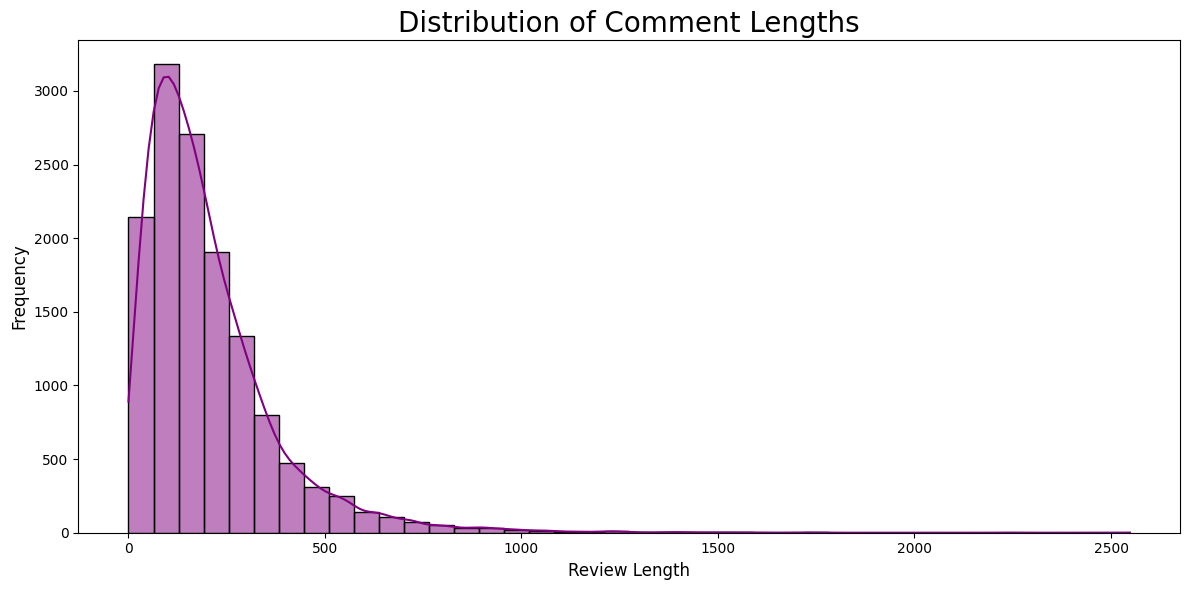

In [17]:
# Plotting the distribution of review lengths to understand the length of reviews

# Create a new column for the length of each review
train_df['Review_length'] = train_df['Recipe_Review'].apply(lambda x: len(str(x)))

# Plot the histogram of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Review_length'], bins=40, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Comment Lengths', fontsize=20)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

### **Plot-7 Inference**
- There's a significant cluster of comments towards the shorter end (under 2000 words), with the number of comments steadily decreasing as length increases.
- This indicates most comments are concise. Interestingly, there are also a few data points extending far beyond the average length.
- These outliers could represent very in-depth and detailed reviews containing substantial extra content(length).

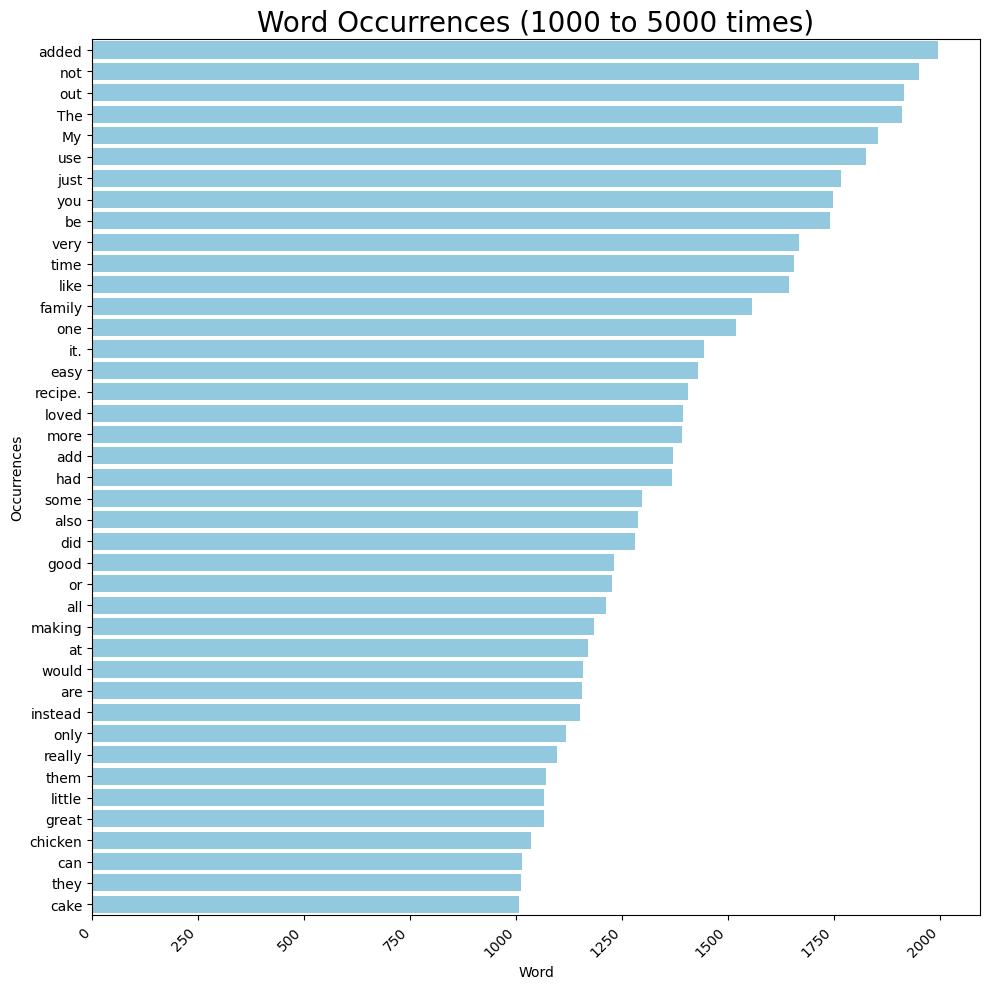

In [18]:
# Plotting the occurences of words in the recipe reviews to understand the most common words

# Split the words in the recipe reviews and count the occurrences of each word 
words = pd.Series(' '.join(train_df['Recipe_Review']).split())
word_counts = words.value_counts()

# Filter words based on occurrence (between 5000 to 1000 times)
filtered_word_counts = word_counts[(word_counts >= 1000) & (word_counts <= 2000)]

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x=filtered_word_counts.values, y=filtered_word_counts.index.values, color= 'skyblue')
plt.title('Word Occurrences (1000 to 5000 times)', fontsize=20)
plt.xlabel('Word')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### **Plot-8 Inference**
This graph depicts the word frequency distribution within user reviews. Interestingly, the most frequent words align with those commonly used in natural language like - the, my, you, me, etc.

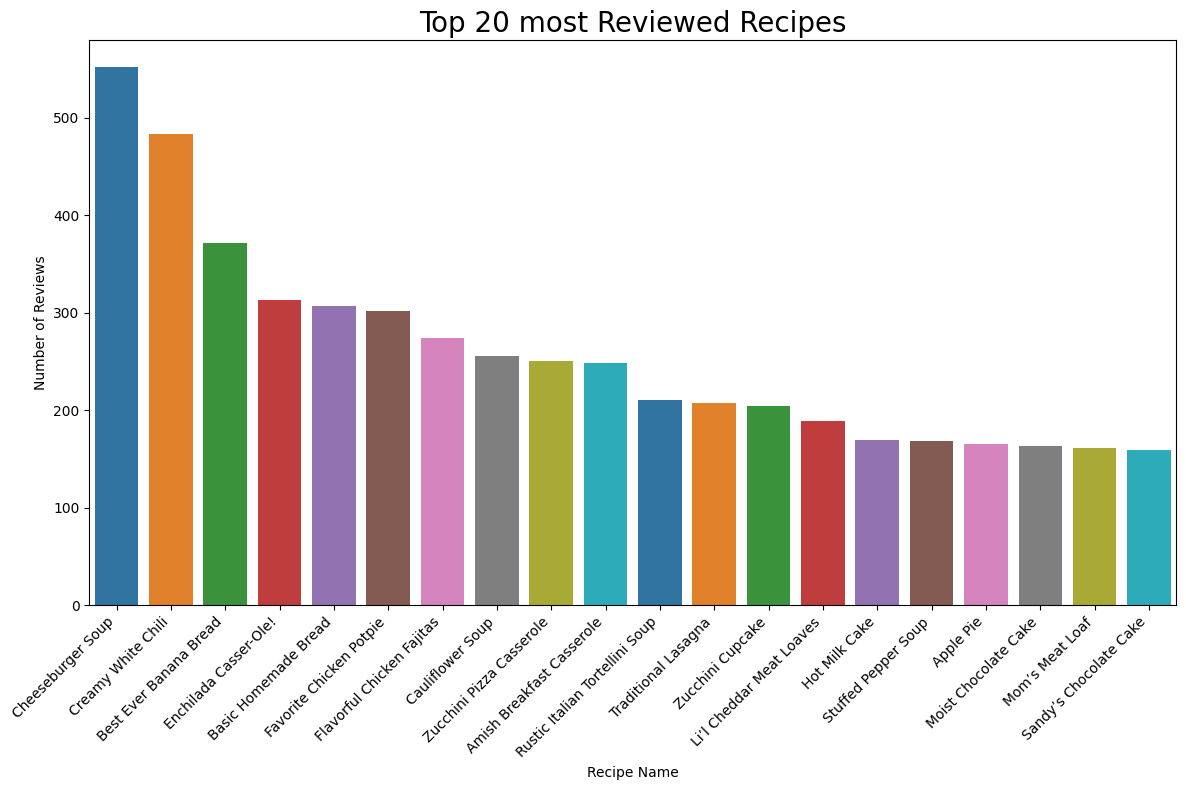

In [19]:
# Plotting the distribution of the most reviewed recipes to understand the most popular recipes
# Get the top 20 most reviewed recipes
top20Recipes = train_df['RecipeName'].value_counts().sort_values(ascending=False)[:20]

# Create a bar plot of the top 20 most reviewed recipes
plt.figure(figsize=(12, 8))
sns.barplot(x=top20Recipes.index, y=top20Recipes.values, palette='tab10')
plt.title('Top 20 most Reviewed Recipes', fontsize = 20)
plt.xlabel('Recipe Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Plot-9 Inference**
The given graph is self explanatory and doesn't need any further explaination.

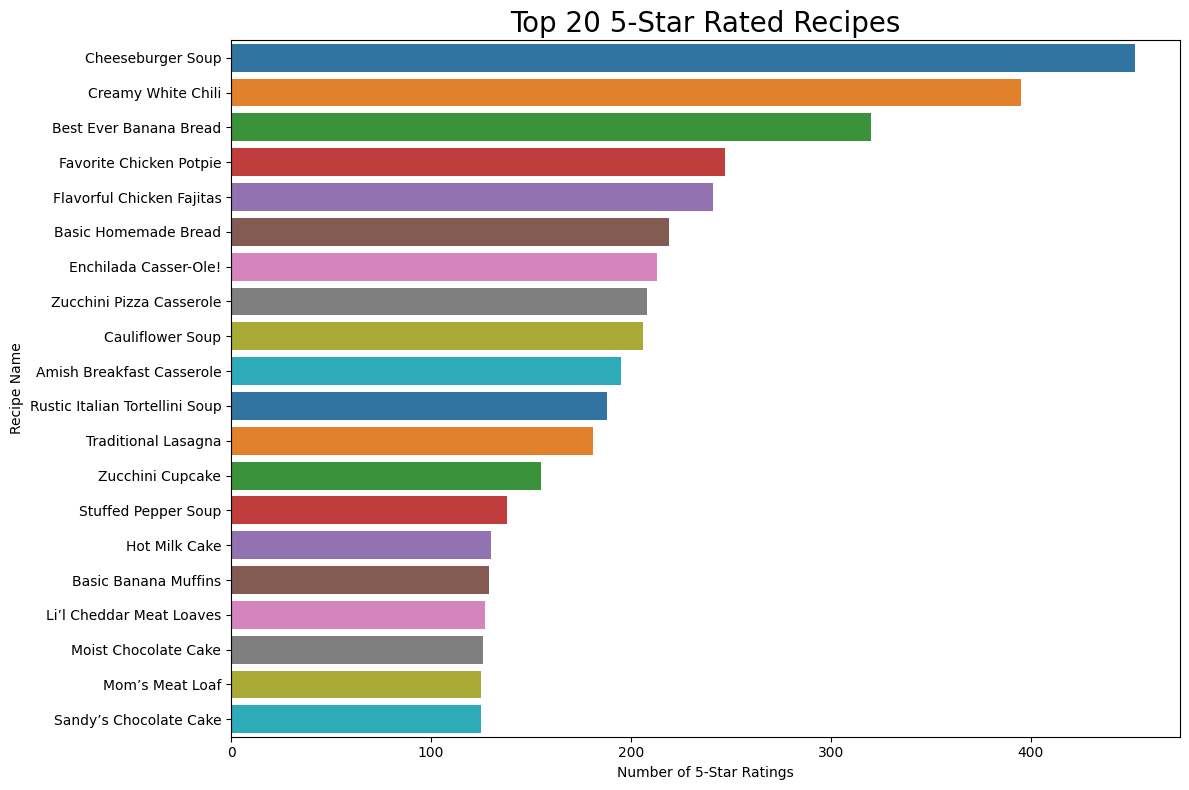

In [20]:
# Plotting the distribution of the top 20 5-star rated recipes to understand the most popular 5-star recipes
# Get the top 20 most reviewed recipes
top20_5star_recipes = train_df[train_df['Rating'] == 5]['RecipeName'].value_counts().sort_values(ascending=False)[:20]

# Create a bar plot of the top 20 most reviewed recipes
plt.figure(figsize=(12, 8))
sns.barplot(x=top20_5star_recipes.values, y=top20_5star_recipes.index, palette='tab10')
plt.title('Top 20 5-Star Rated Recipes', fontsize = 20)
plt.xlabel('Number of 5-Star Ratings')
plt.ylabel('Recipe Name')
plt.tight_layout()
plt.show()

### **Plot-10 Inference**
The given graph is self explanatory and doesn't need any further explaination.

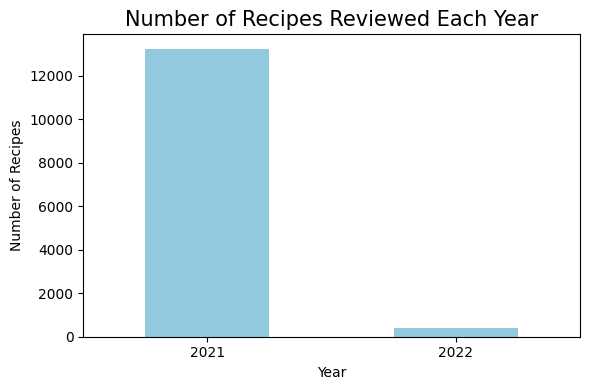

In [21]:
# Plotting the distribution of the top 20 most active users to understand the most active users year-wise

# Convert the Unix timestamp to a datetime object
train_df['CreationDate'] = pd.to_datetime(train_df['CreationTimestamp'], unit='s')

# Extract the date, month, and year from the datetime object
train_df['Date'] = train_df['CreationDate'].dt.date
train_df['Month'] = train_df['CreationDate'].dt.month
train_df['Year'] = train_df['CreationDate'].dt.year

# Count the occurrences of each year
year_counts = train_df['Year'].value_counts().sort_index()

# Create a bar plot of the number of recipes reviewed each year
plt.figure(figsize=(6, 4))
sns.barplot(x=year_counts.index, y=year_counts.values, color='skyblue', width = 0.5)
plt.title('Number of Recipes Reviewed Each Year', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of Recipes')
plt.tight_layout()
plt.show()

### **Plot-11 Inference**
- The 'CreationTimestamp' column is the Unix Timestamp. It's the total number of seconds that have passed since a specific point in time: January 1st, 1970.
- Converting it back to normal dd/mm/yyyy format, we found that the reviews are generally from year 2021-22 only. Most reviews are from year 2021 and very few being from year 2022.

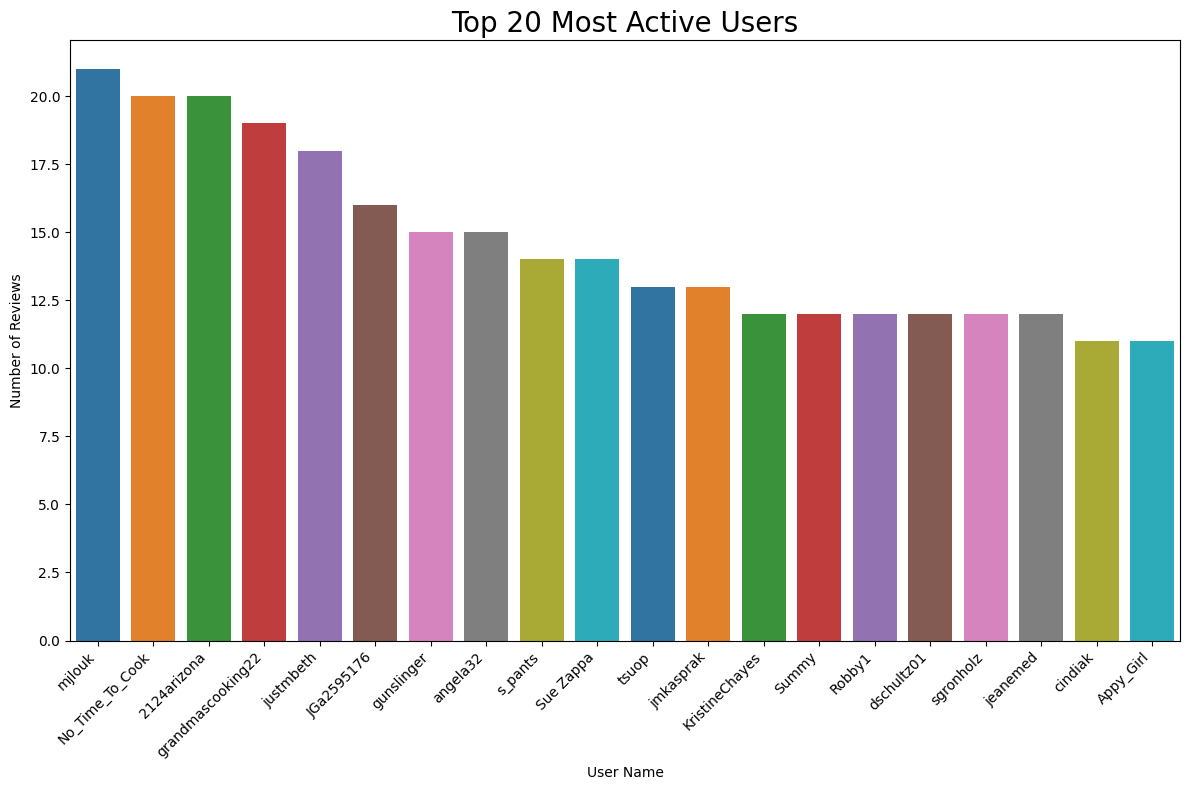

In [22]:
# Get the top 20 most active users
top20ActiveUsers = train_df['UserName'].value_counts().sort_values(ascending=False)[:20]

# Create a bar plot of the top 20 most active users
plt.figure(figsize=(12, 8))
sns.barplot(x=top20ActiveUsers.index, y=top20ActiveUsers.values, palette='tab10')
plt.title('Top 20 Most Active Users', fontsize = 20)
plt.xlabel('User Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Plot-12 Inference**
This chart is also self explanatory i.e. identifies the most active users on the platform, as indicated by the volume of their recipe reviews. 

# **Data Modeling**

Having familiarized ourselves with the training dataset, the next step is to identify the predictor and response variables (also known as independent and dependent variables) from the traing dataset. 

In [23]:
# Splitting Dependent and Independent Variables from training data
X = train_df.drop('Rating', axis = 1)
y = train_df['Rating']

To evaluate model performance, we will split the training data into training and validation sets using a stratified random sampling approach. This ensures a proportional representation of class labels in both sets, which is crucial for multi-class classification tasks. The validation set will comprise 20% of the total data.

In [24]:
# Spliting training Data into Model training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = ARGS.val_split,
                                                 random_state = ARGS.seed, stratify = y)
X_test = test_df
print('Training Data Split\t', X_train.shape, y_train.shape)
print('Validation Data Split\t', X_val.shape, y_val.shape)
print('Testing Data Split\t', X_test.shape)

Training Data Split	 (10907, 19) (10907,)
Validation Data Split	 (2727, 19) (2727,)
Testing Data Split	 (4546, 14)


## **Feature Engineering / Selection**

1. <u>Dimensionality Reduction based on Co-Relation:</u>

Following an initial exploratory data analysis (EDA), I conducted a feature importance analysis to identify the most informative numerical continuous features. This analysis revealed that ThumbsUpCount, ThumbsDownCount, and ReplyCount exhibit the strongest correlations with the target variable. Consequently, I have opted to proceed with these features only, discarding the remaining numerical features to mitigate the potential for model overfitting and redundancy.

2. <u>Targeted Selection of Categorical Features:</u>

For categorical features, I have chosen to retain only the "Recipe_Code" column. As this column represents unique identifiers for recipe names, it serves as a crucial factor in capturing recipe-specific information relevant to the target variable. Including additional categorical features without a clear rationale could introduce noise and potentially hinder model performance.

In [25]:
# Creating a DataFrame to record the performance metrics of all the models
metrics = pd.DataFrame(columns = ['Accuracy', 'F1_Score'])

## **Baseline : Dummy Classifier**

In [26]:
# Create a dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the classifier on the training data
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_val)
metrics.loc['Dummy Classifier'] = [accuracy_score(y_val, dummy_pred), f1_score(y_val, dummy_pred, average = 'macro')]
print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
print(classification_report(y_val, dummy_pred))
print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

========================= Model : Dummy Classifier =========================

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       254
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00       248
           5       0.76      1.00      0.86      2074

    accuracy                           0.76      2727
   macro avg       0.13      0.17      0.14      2727
weighted avg       0.58      0.76      0.66      2727


Accuracy (Validation Data) : 76.054%
Macro F1-Score (Validation Data) : 0.144


The DummyClassifier model has an overall accuracy of 76.05%. This means that the model correctly predicted the class 76.05% of the time on the validation data. However, accuracy alone can be misleading, especially in imbalanced datasets.

Looking at the classification report, we see that the model has a high precision, recall, and f1-score for class 5. This suggests that the model is performing well in predicting class 5.

However, for all other classes (0 to 4), the precision, recall, and f1-score are all 0. This means that the model is not able to correctly predict these classes at all. It's likely that the model is predicting most or all of the instances as class 5, which is why the accuracy is high.

## **Feature Preprocessing Strategy**
To improve model performance, I will be implementing the following feature preprocessing techniques:

- **Numerical Feature Transformation:**

I will address the positive skew observed in continuous numerical columns like "ThumbsUpCount," "ThumbsDownCount," and "ReplyCount" by applying a logarithmic transformation. This transformation helps normalize the distribution of these features and allows the model to learn from them more effectively.

- **Categorical Feature Encoding:**

The categorical column "Recipe_Code" will be preprocessed using one-hot encoding. This approach creates a new binary feature for each unique category within the original column. This allows the model to learn the relationships between different recipe codes and the target variable (rating).

- **Textual Feature Vectorization:**

Given the limitations in applying TF-IDF weighting due to potential preprocessing challenges, I propose utilizing a simple count vectorizer for the textual review column. This method will capture the frequency of each word within the reviews, providing the model with basic information about word usage patterns.

- **Feature Selection for Dimensionality Reduction:**

Following feature preprocessing, it is likely that some features will exhibit zero variance, meaning they have no variation across the data. These features provide no informative value to the model. I will employ a method to identify and remove these features after completing the preprocessing steps. This helps reduce the dimensionality of the data and potentially improve model performance and efficiency.

In [27]:
class ModelPipeline:
    def __init__(self, classifier, count_params=None):
        self.numerical_feats = ['ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount']
        self.categorical_feats = ['RecipeCode']
        self.textual_feats = ['Recipe_Review']

        self.classifier = classifier
        self.count_params = count_params
        
        self.numerical_transformer = Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),
            ('log', FunctionTransformer(np.log1p)),
            ('scaler', RobustScaler())
        ])

        self.categorical_transformer = Pipeline(steps=[
            ('ohe', OneHotEncoder())
        ])

        self.textual_transformer = Pipeline(steps=[
            ('count', CountVectorizer(**(count_params or {})))
        ])

        self.column_preprocessor = ColumnTransformer(
            transformers=[
                ('Numerical_Features', self.numerical_transformer, self.numerical_feats),
                ('Textual_Features', self.textual_transformer, self.textual_feats[0]),
                ('Categorical_Features', self.categorical_transformer, self.categorical_feats)
            ]
        )

        self.model = Pipeline(steps = [
            ('Column_Preprocessor', self.column_preprocessor),
            ('Feature_Selector',VarianceThreshold(threshold=0)),
            ('Classification_Model', self.classifier)
        ])
        
    def get_params(self, deep=True):
        return {"classifier": self.classifier, "count_params": self.count_params}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def fit_transform(self, X, y=None):
        return self.model.fit_transform(X, y)
    
    def predict(self, X, y=None):
        return self.model.predict(X)
    
    def predict_proba(self, X, y=None):
        return self.model.predict_proba(X)

    def transform(self, X):
        return self.model.transform(X)

    def fit(self, X, y=None):
        self.model.fit(X, y)
        return self

In [28]:
# def cross_validation(model, X_train, y_train, X_test, y_test):
#     cv = RepeatedStratifiedKFold(n_splits=2, n_repeats = 5, random_state=42)
#     print('='*80 + '\n' + '-'*31 + ' Cross-Validation ' + '-'*31 + '\n' + '='*80)
#     cv_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, verbose = 3)
#     print('\n[CV] Accuracy Score : {:.3f}%'.format(np.mean(cv_scores)*100))
#     print('[CV] Std. Deviation : {:.3f}'.format(np.mean(cv_scores)))
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print("\nClassification Report on Validation Data:")
#     print(classification_report(y_test, y_pred))
#     print('Overall Accuracy on Validation Data : {:.3f}%'.format(accuracy_score(y_test, y_pred)*100))

## **Model-1 : Logistic Regression**

In [29]:
# Create a dummy classifier
baseline_LR = ModelPipeline(classifier = linear_model.LogisticRegression())

# Fit the classifier on the training data
baseline_LR.fit(X_train, y_train)
base_LR_pred = baseline_LR.predict(X_val)
metrics.loc['Baseline LR'] = [accuracy_score(y_val, base_LR_pred), f1_score(y_val, base_LR_pred, average = 'macro')]
print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
print(classification_report(y_val, base_LR_pred))
print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

========================= Model : Baseline LR =========================

              precision    recall  f1-score   support

           0       0.37      0.26      0.30       254
           1       0.35      0.26      0.30        42
           2       0.17      0.09      0.11        35
           3       0.35      0.26      0.30        74
           4       0.28      0.19      0.22       248
           5       0.83      0.92      0.87      2074

    accuracy                           0.75      2727
   macro avg       0.39      0.33      0.35      2727
weighted avg       0.71      0.75      0.73      2727


Accuracy (Validation Data) : 75.028%
Macro F1-Score (Validation Data) : 0.352


In [30]:
# params = {
#     'baseline_LR__Column_Preprocessor__Textual_Features__count__ngram_range': [(1, 2), (1, 3), (1, 4)],
#     'baseline_LR__Column_Preprocessor__Textual_Features__count__max_df': [0.25, 0.3, 0.35, 0.4],
#     'baseline_LR__Column_Preprocessor__Textual_Features__count__min_df': [1, 2, 3],
#     'baseline_LR__Classification_Model__random_state': [42],
#     'baseline_LR__Classification_Model__multi_class': ['multinomial'],
#     'baseline_LR__Classification_Model__solver': ['saga'],
#     'baseline_LR__Classification_Model__penalty': ['l2'],
#     'baseline_LR__Classification_Model__C': [0.01, 0.1, 1, 5],
#     'baseline_LR__Classification_Model__fit_intercept': [True, False],
#     'baseline_LR__Classification_Model__max_iter': [500, 1000],
#     'baseline_LR__Classification_Model__n_jobs': [-1]
# }

# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats = 5, random_state=42)
# LR_grid_search = GridSearchCV(baseline_LR, params, cv=cv, n_jobs=-1, verbose=3, scoring= 'accuracy')

# LR_grid_search.fit(X_train, y_train)

# best_params_LR = LR_grid_search.best_params_
# print(best_params_LR)

In [31]:
LR_count_params = {
    'ngram_range': (1,4),
    'max_df': 0.35,
    'min_df': 1
}
LR_model_params = {
    'random_state': 42, 
    'multi_class': 'multinomial', 
    'solver': 'saga', 
    'penalty': 'l2',
    'C': 5,
    'fit_intercept': True,
    'max_iter': 1000,
    'n_jobs': -1
}
hpt_LR = ModelPipeline(classifier = linear_model.LogisticRegression(**LR_model_params), count_params = LR_count_params)
hpt_LR.model

Pipeline(steps=[('Column_Preprocessor',
                 ColumnTransformer(transformers=[('Numerical_Features',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount']),
                                                 ('Textual_Features',
                                                  Pipeline(steps=[('count',
                                                                   CountVectorizer(max_df=0.35,
                                                                                   ngram_range=(1,
                                                                                                4)))]),
                                                  'Recipe_Review'),
                                                 ('Categorical_Features',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['RecipeCode'])])),
                ('Feature_Selector', VarianceThreshold(threshold=0)),
                ('Classification_Model',
                 LogisticRegression(C=5, max_iter=1000,
                                    multi_class='multinomial', n_jobs=-1,
                                    random_state=42, solver='saga'))])

In [32]:
# Fit the classifier on the training data
hpt_LR.fit(X_train, y_train)
hpt_LR_pred = hpt_LR.predict(X_val)
metrics.loc['HPT LR'] = [accuracy_score(y_val, hpt_LR_pred), f1_score(y_val, hpt_LR_pred, average = 'macro')]
print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
print(classification_report(y_val, base_LR_pred))
print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

========================= Model : HPT LR =========================

              precision    recall  f1-score   support

           0       0.37      0.26      0.30       254
           1       0.35      0.26      0.30        42
           2       0.17      0.09      0.11        35
           3       0.35      0.26      0.30        74
           4       0.28      0.19      0.22       248
           5       0.83      0.92      0.87      2074

    accuracy                           0.75      2727
   macro avg       0.39      0.33      0.35      2727
weighted avg       0.71      0.75      0.73      2727


Accuracy (Validation Data) : 78.181%
Macro F1-Score (Validation Data) : 0.342


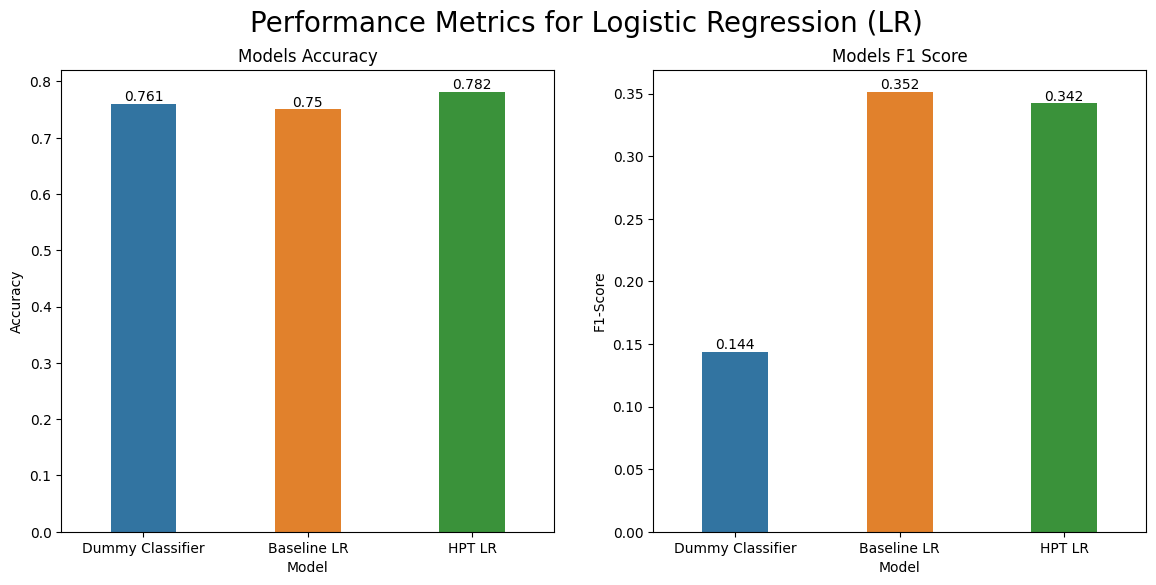

In [33]:
indices = [metrics.index[0], metrics.index[-2], metrics.index[-1]]
fig, axes = plt.subplots(1, 2, figsize = (14,6))
ax = axes.ravel()

bars = sns.barplot(x=indices, y=metrics.loc[indices, 'Accuracy'], ax = ax[0], width=0.4)
ax[0].set_title('Models Accuracy')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

bars = sns.barplot(x=indices, y=metrics.loc[indices, 'F1_Score'], ax = ax[1], width=0.4)
ax[1].set_title('Models F1 Score')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1-Score')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

plt.suptitle('Performance Metrics for Logistic Regression (LR)', fontsize = 20)
plt.show()

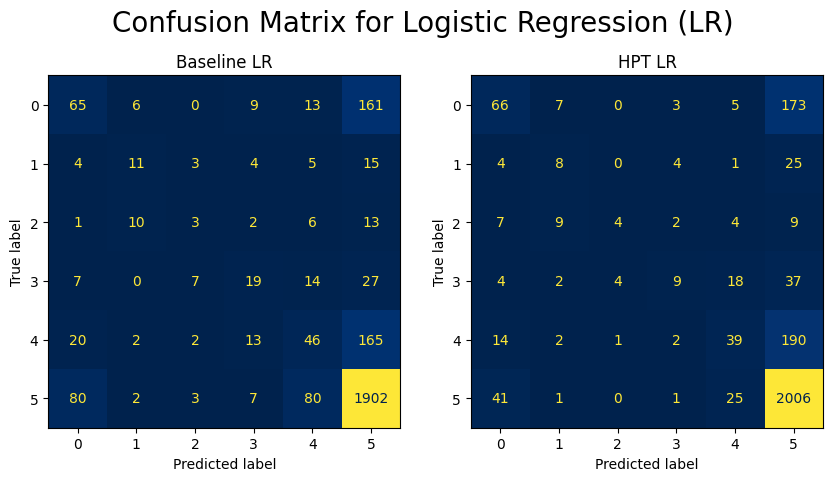

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Confusion matrix for base_LR_pred
cm1 = confusion_matrix(y_val, base_LR_pred, labels=sorted(y_val.unique()))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=sorted(y_val.unique()))
disp1.plot(ax=axes[0], cmap=plt.cm.cividis, colorbar=False)
axes[0].set_title(f'{metrics.index[-2]}')

cm2 = confusion_matrix(y_val, hpt_LR_pred, labels=sorted(y_val.unique()))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=sorted(y_val.unique()))
disp2.plot(ax=axes[1], cmap=plt.cm.cividis, colorbar=False)
axes[1].set_title(f'{metrics.index[-1]}')

plt.suptitle('Confusion Matrix for Logistic Regression (LR)', fontsize = 20)
plt.show()

## **Model-2 : K-Nearest Neighbour (KNN)**

In [35]:
# Create a dummy classifier
baseline_KNN = ModelPipeline(classifier = neighbors.KNeighborsClassifier())

# Fit the classifier on the training data
baseline_KNN.fit(X_train, y_train)
base_KNN_pred = baseline_KNN.predict(X_val)
metrics.loc['Baseline KNN'] = [accuracy_score(y_val, base_KNN_pred), f1_score(y_val, base_KNN_pred, average = 'macro')]
print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
print(classification_report(y_val, base_KNN_pred))
print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

========================= Model : Baseline KNN =========================

              precision    recall  f1-score   support

           0       0.30      0.13      0.18       254
           1       0.24      0.10      0.14        42
           2       0.67      0.06      0.11        35
           3       0.00      0.00      0.00        74
           4       0.26      0.08      0.12       248
           5       0.79      0.95      0.86      2074

    accuracy                           0.74      2727
   macro avg       0.37      0.22      0.23      2727
weighted avg       0.66      0.74      0.68      2727


Accuracy (Validation Data) : 74.367%
Macro F1-Score (Validation Data) : 0.233


In [36]:
# params = {
#     'baseline_KNN__Column_Preprocessor__Textual_Features__count__ngram_range': [(1, 3), (1, 4)],
#     'baseline_KNN__Column_Preprocessor__Textual_Features__count__max_df': [0.75, 0.85, 0.95],
#     'baseline_KNN__Column_Preprocessor__Textual_Features__count__min_df': [11, 12, 13],
#     'baseline_KNN__Classification_Model__random_state': [42],
#     'baseline_KNN__Classification_Model__n_neighbors': [30, 32,  34],
#     'baseline_KNN__Classification_Model__weights': ['uniform', 'distance'],
#     'baseline_KNN__Classification_Model__p': [1,2],
#     'baseline_KNN__Classification_Model__leaf_size': range(10, 20, 2),
#     'baseline_KNN__Classification_Model__n_jobs': [-1]
# }

# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats = 5, random_state=42)
# KNN_grid_search = GridSearchCV(baseline_LR, params, cv=cv, n_jobs=-1, verbose=3, scoring= 'accuracy')

# KNN_grid_search.fit(X_train, y_train)

# best_params_KNN = KNN_grid_search.best_params_
# print(best_params_KNN)

In [37]:
KNN_count_params = {
    'ngram_range': (1,4),
    'max_df': 0.95,
    'min_df': 13
}
KNN_model_params = {
    'n_neighbors': 32,
    'weights': 'distance',
    'p': 2,
    'leaf_size': 18,
    'n_jobs': -1
}
hpt_KNN = ModelPipeline(classifier = neighbors.KNeighborsClassifier(**KNN_model_params), count_params = KNN_count_params)
hpt_KNN.model

Pipeline(steps=[('Column_Preprocessor',
                 ColumnTransformer(transformers=[('Numerical_Features',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount']),
                                                 ('Textual_Features',
                                                  Pipeline(steps=[('count',
                                                                   CountVectorizer(max_df=0.95,
                                                                                   min_df=13,
                                                                                   ngram_range=(1,
                                                                                                4)))]),
                                                  'Recipe_Review'),
                                                 ('Categorical_Features',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['RecipeCode'])])),
                ('Feature_Selector', VarianceThreshold(threshold=0)),
                ('Classification_Model',
                 KNeighborsClassifier(leaf_size=18, n_jobs=-1, n_neighbors=32,
                                      weights='distance'))])

In [38]:
# Fit the classifier on the training data
hpt_KNN.fit(X_train, y_train)
hpt_KNN_pred = hpt_KNN.predict(X_val)
metrics.loc['HPT KNN'] = [accuracy_score(y_val, hpt_KNN_pred), f1_score(y_val, hpt_KNN_pred, average = 'macro')]
print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
print(classification_report(y_val, hpt_KNN_pred))
print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

========================= Model : HPT KNN =========================

              precision    recall  f1-score   support

           0       0.33      0.07      0.12       254
           1       0.30      0.07      0.12        42
           2       1.00      0.03      0.06        35
           3       1.00      0.05      0.10        74
           4       1.00      0.03      0.05       248
           5       0.77      0.99      0.87      2074

    accuracy                           0.76      2727
   macro avg       0.73      0.21      0.22      2727
weighted avg       0.76      0.76      0.68      2727


Accuracy (Validation Data) : 76.458%
Macro F1-Score (Validation Data) : 0.219


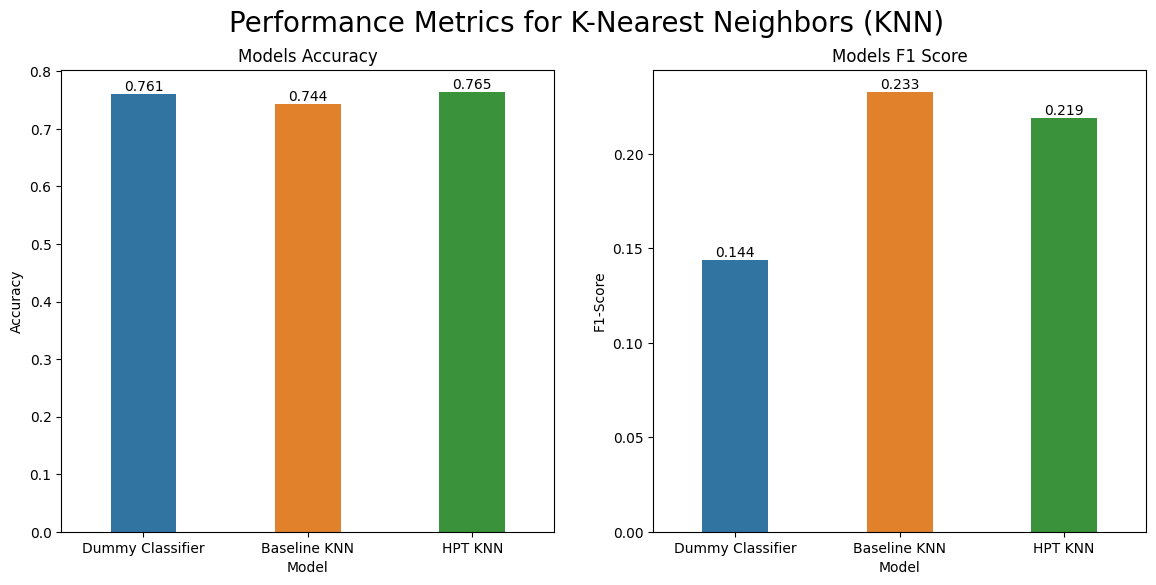

In [39]:
indices = [metrics.index[0], metrics.index[-2], metrics.index[-1]]
fig, axes = plt.subplots(1, 2, figsize = (14,6))
ax = axes.ravel()

bars = sns.barplot(x=indices, y=metrics.loc[indices, 'Accuracy'], ax = ax[0], width=0.4)
ax[0].set_title('Models Accuracy')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

bars = sns.barplot(x=indices, y=metrics.loc[indices, 'F1_Score'], ax = ax[1], width=0.4)
ax[1].set_title('Models F1 Score')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1-Score')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

plt.suptitle('Performance Metrics for K-Nearest Neighbors (KNN)', fontsize = 20)
plt.show()

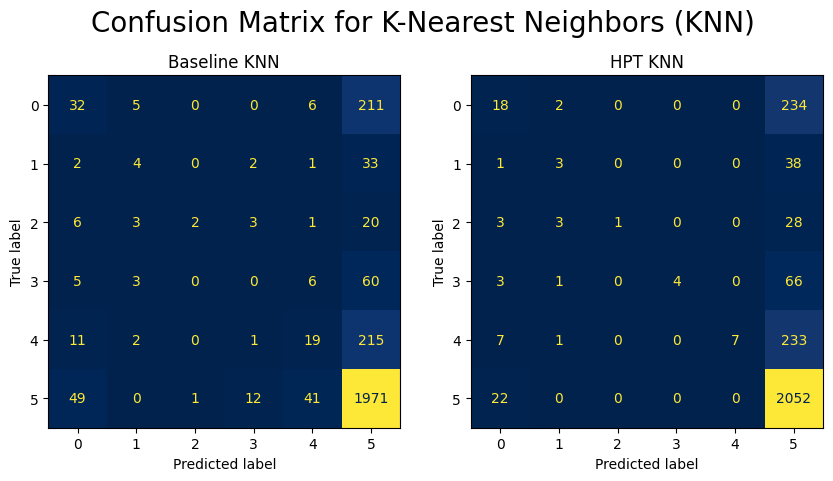

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Confusion matrix for base_LR_pred
cm1 = confusion_matrix(y_val, base_KNN_pred, labels=sorted(y_val.unique()))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=sorted(y_val.unique()))
disp1.plot(ax=axes[0], cmap=plt.cm.cividis, colorbar=False)
axes[0].set_title(f'{metrics.index[-2]}')

cm2 = confusion_matrix(y_val, hpt_KNN_pred, labels=sorted(y_val.unique()))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=sorted(y_val.unique()))
disp2.plot(ax=axes[1], cmap=plt.cm.cividis, colorbar=False)
axes[1].set_title(f'{metrics.index[-1]}')

plt.suptitle('Confusion Matrix for K-Nearest Neighbors (KNN)', fontsize = 20)
plt.show()

## **Model-3 : Xtreme Gradient Boosting (XGBoost)**

In [41]:
# Create a dummy classifier
baseline_XGB = ModelPipeline(classifier = xgb.XGBClassifier())

# Fit the classifier on the training data
baseline_XGB.fit(X_train, y_train)
base_XGB_pred = baseline_XGB.predict(X_val)
metrics.loc['Baseline XGB'] = [accuracy_score(y_val, base_XGB_pred), f1_score(y_val, base_XGB_pred, average = 'macro')]
print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
print(classification_report(y_val, base_XGB_pred))
print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

========================= Model : Baseline XGB =========================

              precision    recall  f1-score   support

           0       0.52      0.18      0.26       254
           1       0.50      0.29      0.36        42
           2       0.78      0.20      0.32        35
           3       0.47      0.11      0.18        74
           4       0.36      0.08      0.14       248
           5       0.80      0.98      0.88      2074

    accuracy                           0.78      2727
   macro avg       0.57      0.31      0.36      2727
weighted avg       0.72      0.78      0.72      2727


Accuracy (Validation Data) : 77.888%
Macro F1-Score (Validation Data) : 0.357


In [42]:
# params = {
#     'baseline_XGB__Column_Preprocessor__Textual_Features__count__ngram_range': [(1, 3), (1, 4)],
#     'baseline_XGB__Column_Preprocessor__Textual_Features__count__max_df': [0.75, 0.85, 0.95],
#     'baseline_XGB__Column_Preprocessor__Textual_Features__count__min_df': [18, 19, 20],
#     'baseline_XGB__Classification_Model__random_state': [42],
#     'baseline_XGB__Classification_Model__n_estimators': [500, 750, 1000, 1250],
#     'baseline_XGB__Classification_Model__subsample': range(0.2, 1.0, 0.2),
#     'baseline_XGB__Classification_Model__max_depth': [2, 6, 10, 14],
#     'baseline_XGB__Classification_Model__learning_rate': [1, 0.6, 0.06],
#     'baseline_XGB__Classification_Model__colsample_bytree': range(0.2, 1.0, 0.2),
#     'baseline_XGB__Classification_Model__n_jobs': [-1]
# }

# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats = 5, random_state=42)
# XGB_grid_search = GridSearchCV(baseline_LR, params, cv=cv, n_jobs=-1, verbose=3, scoring= 'accuracy')

# XGB_grid_search.fit(X_train, y_train)

# best_params_XGB = XGB_grid_search.best_params_
# print(best_params_XGB)

In [43]:
XGB_count_params = {
    'ngram_range': (1,3),
    'max_df': 0.75,
    'min_df': 18
}
XGB_model_params = {
    'random_state': 42,
    'n_estimators': 1000,
    'max_depth': 10,
    'learning_rate': 0.06,
    'subsample': 0.6, 
    'colsample_bytree': 0.6,
    'n_jobs': -1
}
hpt_XGB = ModelPipeline(classifier = xgb.XGBClassifier(**XGB_model_params), count_params = XGB_count_params)
hpt_XGB.model

Pipeline(steps=[('Column_Preprocessor',
                 ColumnTransformer(transformers=[('Numerical_Features',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount']),
                                                 ('Textual_Features',
                                                  Pipeline(steps=[('count',
                                                                   CountVectorizer(max_d...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.06,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [44]:
# Fit the classifier on the training data
hpt_XGB.fit(X_train, y_train)
hpt_XGB_pred = hpt_XGB.predict(X_val)
metrics.loc['HPT XGB'] = [accuracy_score(y_val, hpt_XGB_pred), f1_score(y_val, hpt_XGB_pred, average = 'macro')]
print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
print(classification_report(y_val, hpt_XGB_pred))
print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

========================= Model : HPT XGB =========================

              precision    recall  f1-score   support

           0       0.57      0.26      0.36       254
           1       0.50      0.24      0.32        42
           2       0.57      0.11      0.19        35
           3       0.42      0.14      0.20        74
           4       0.40      0.15      0.21       248
           5       0.81      0.97      0.88      2074

    accuracy                           0.78      2727
   macro avg       0.54      0.31      0.36      2727
weighted avg       0.73      0.78      0.74      2727


Accuracy (Validation Data) : 78.254%
Macro F1-Score (Validation Data) : 0.362


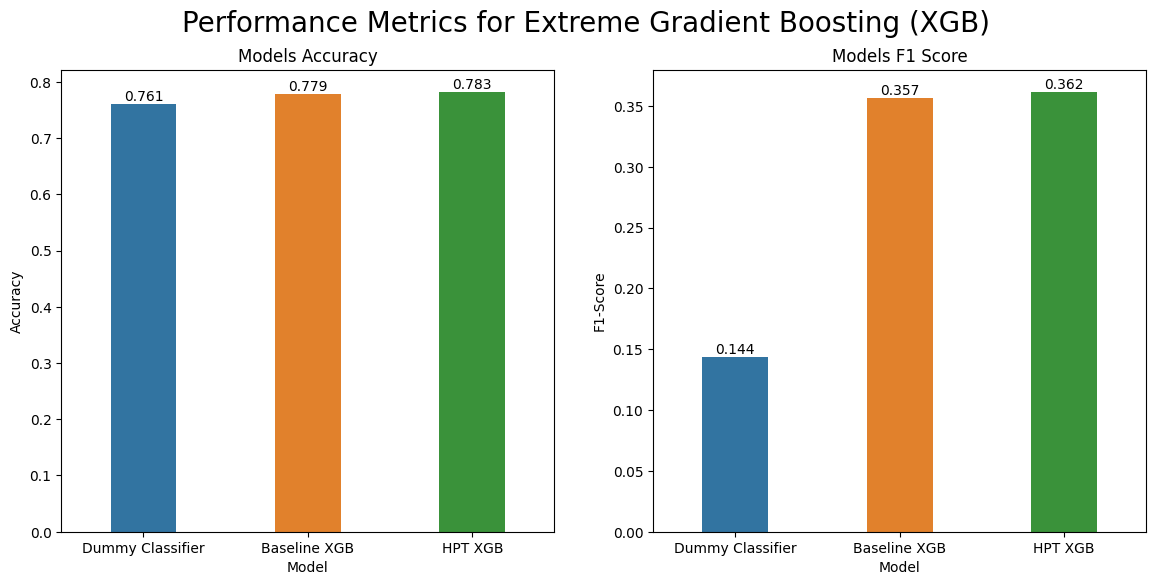

In [45]:
indices = [metrics.index[0], metrics.index[-2], metrics.index[-1]]
fig, axes = plt.subplots(1, 2, figsize = (14,6))
ax = axes.ravel()

bars = sns.barplot(x=indices, y=metrics.loc[indices, 'Accuracy'], ax = ax[0], width=0.4)
ax[0].set_title('Models Accuracy')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

bars = sns.barplot(x=indices, y=metrics.loc[indices, 'F1_Score'], ax = ax[1], width=0.4)
ax[1].set_title('Models F1 Score')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1-Score')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

plt.suptitle('Performance Metrics for Extreme Gradient Boosting (XGB)', fontsize = 20)
plt.show()

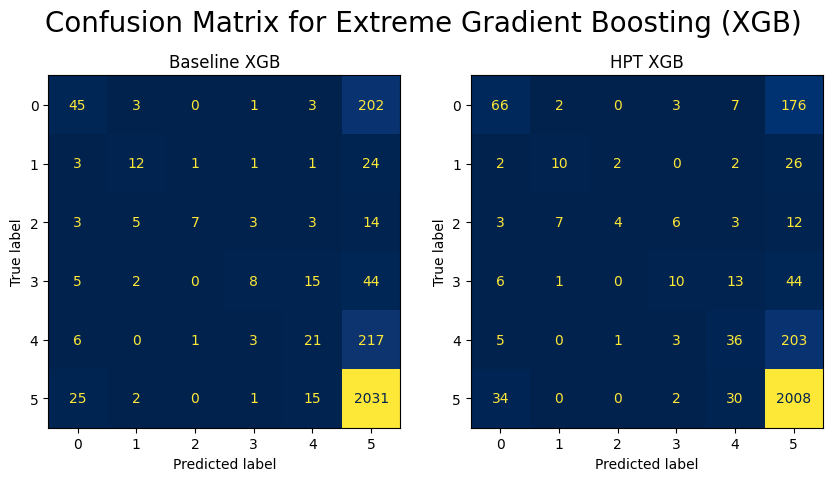

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Confusion matrix for base_LR_pred
cm1 = confusion_matrix(y_val, base_XGB_pred, labels=sorted(y_val.unique()))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=sorted(y_val.unique()))
disp1.plot(ax=axes[0], cmap=plt.cm.cividis, colorbar=False)
axes[0].set_title(f'{metrics.index[-2]}')

cm2 = confusion_matrix(y_val, hpt_XGB_pred, labels=sorted(y_val.unique()))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=sorted(y_val.unique()))
disp2.plot(ax=axes[1], cmap=plt.cm.cividis, colorbar=False)
axes[1].set_title(f'{metrics.index[-1]}')

plt.suptitle('Confusion Matrix for Extreme Gradient Boosting (XGB)', fontsize = 20)
plt.show()

## **Model-4 : Support Vector Machine (SVM)**

In [47]:
baseline_SVC = ModelPipeline(classifier = svm.SVC())

# Fit the classifier on the training data
baseline_SVC.fit(X_train, y_train)
base_SVC_pred = baseline_SVC.predict(X_val)
metrics.loc['Baseline SVC'] = [accuracy_score(y_val, base_SVC_pred), f1_score(y_val, base_SVC_pred, average = 'macro')]
print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
print(classification_report(y_val, base_SVC_pred))
print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

========================= Model : Baseline SVC =========================

              precision    recall  f1-score   support

           0       0.56      0.04      0.07       254
           1       0.25      0.07      0.11        42
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00       248
           5       0.77      1.00      0.87      2074

    accuracy                           0.76      2727
   macro avg       0.26      0.18      0.17      2727
weighted avg       0.64      0.76      0.67      2727


Accuracy (Validation Data) : 76.348%
Macro F1-Score (Validation Data) : 0.174


In [48]:
# params = {
#     'baseline_SVC__Column_Preprocessor__Textual_Features__count__ngram_range': [(1, 3), (1, 4)],
#     'baseline_SVC__Column_Preprocessor__Textual_Features__count__max_df': [0.35, 0.65, 0.85],
#     'baseline_SVC__Column_Preprocessor__Textual_Features__count__min_df': [8, 9, 10],
#     'baseline_SVC__Classification_Model__random_state': [42],
#     'baseline_SVC__Classification_Model__kernel': ['rbf', 'poly'],
#     'baseline_SVC__Classification_Model__probability': [True, False],
#     'baseline_SVC__Classification_Model__decision_function_shape': ['ovo', 'ovr'],
#     'baseline_SVC__Classification_Model__C': [0.05, 0.5, 5],
#     'baseline_SVC__Classification_Model__max_iter': [250, 500]
# }

# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats = 5, random_state=42)
# SVC_grid_search = GridSearchCV(baseline_LR, params, cv=cv, n_jobs=-1, verbose=3, scoring= 'accuracy')

# SVC_grid_search.fit(X_train, y_train)

# best_params_SVC = SVC_grid_search.best_params_
# print(best_params_SVC)

In [49]:
SVC_count_params = {
    'ngram_range': (1,3),
    'max_df': 0.35,
    'min_df': 9
}
SVC_model_params = {
    'random_state': 42, 
    'kernel': 'poly', 
    'probability': True,
    'C': 0.05,
    'decision_function_shape': 'ovo',
    'max_iter': 250
}
hpt_SVC = ModelPipeline(classifier = svm.SVC(**SVC_model_params), count_params = SVC_count_params)
hpt_SVC.model

Pipeline(steps=[('Column_Preprocessor',
                 ColumnTransformer(transformers=[('Numerical_Features',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount']),
                                                 ('Textual_Features',
                                                  Pipeline(steps=[('count',
                                                                   CountVectorizer(max_df=0.35,
                                                                                   min_df=9,
                                                                                   ngram_range=(1,
                                                                                                3)))]),
                                                  'Recipe_Review'),
                                                 ('Categorical_Features',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['RecipeCode'])])),
                ('Feature_Selector', VarianceThreshold(threshold=0)),
                ('Classification_Model',
                 SVC(C=0.05, decision_function_shape='ovo', kernel='poly',
                     max_iter=250, probability=True, random_state=42))])

In [50]:
# Fit the classifier on the training data
hpt_SVC.fit(X_train, y_train)
hpt_SVC_pred = hpt_SVC.predict(X_val)
metrics.loc['HPT SVC'] = [accuracy_score(y_val, hpt_SVC_pred), f1_score(y_val, hpt_SVC_pred, average = 'macro')]
print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
print(classification_report(y_val, hpt_SVC_pred))
print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

========================= Model : HPT SVC =========================

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       254
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00       248
           5       0.76      1.00      0.86      2074

    accuracy                           0.76      2727
   macro avg       0.13      0.17      0.14      2727
weighted avg       0.58      0.76      0.66      2727


Accuracy (Validation Data) : 76.054%
Macro F1-Score (Validation Data) : 0.144


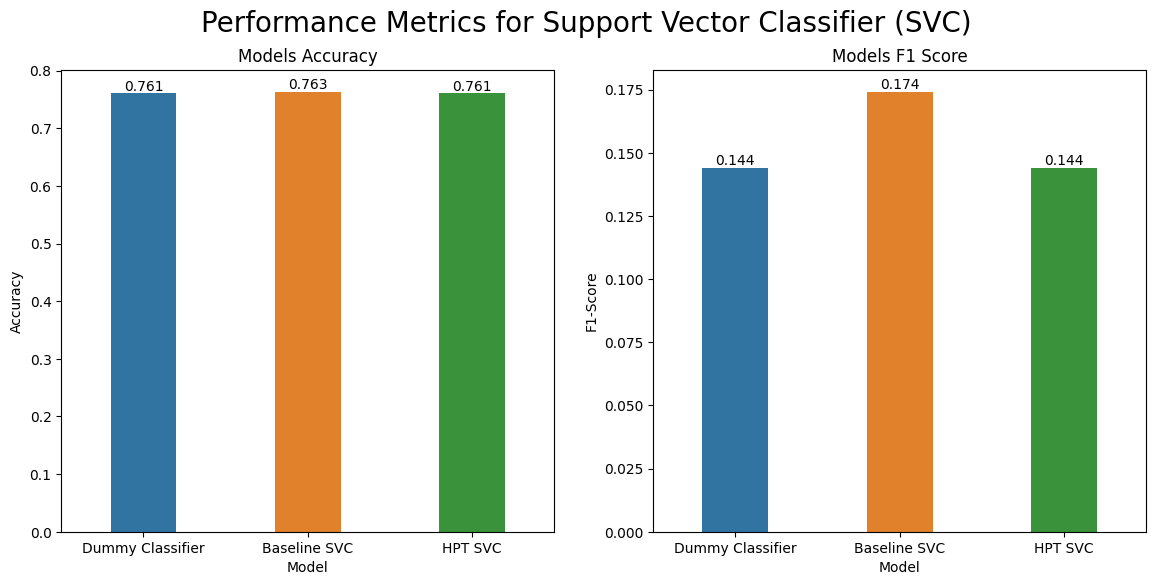

In [51]:
indices = [metrics.index[0], metrics.index[-2], metrics.index[-1]]
fig, axes = plt.subplots(1, 2, figsize = (14,6))
ax = axes.ravel()

bars = sns.barplot(x=indices, y=metrics.loc[indices, 'Accuracy'], ax = ax[0], width=0.4)
ax[0].set_title('Models Accuracy')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

bars = sns.barplot(x=indices, y=metrics.loc[indices, 'F1_Score'], ax = ax[1], width=0.4)
ax[1].set_title('Models F1 Score')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1-Score')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

plt.suptitle('Performance Metrics for Support Vector Classifier (SVC)', fontsize = 20)
plt.show()

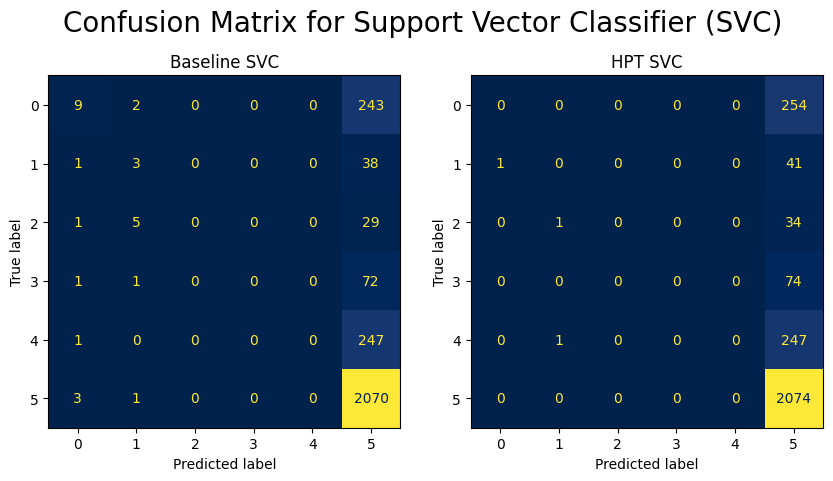

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Confusion matrix for base_LR_pred
cm1 = confusion_matrix(y_val, base_SVC_pred, labels=sorted(y_val.unique()))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=sorted(y_val.unique()))
disp1.plot(ax=axes[0], cmap=plt.cm.cividis, colorbar=False)
axes[0].set_title(f'{metrics.index[-2]}')

cm2 = confusion_matrix(y_val, hpt_SVC_pred, labels=sorted(y_val.unique()))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=sorted(y_val.unique()))
disp2.plot(ax=axes[1], cmap=plt.cm.cividis, colorbar=False)
axes[1].set_title(f'{metrics.index[-1]}')

plt.suptitle('Confusion Matrix for Support Vector Classifier (SVC)', fontsize = 20)
plt.show()

## **Model-5 : Multi-layer Perceptron (MLP)**

In [53]:
baseline_MLP = ModelPipeline(classifier = neural_network.MLPClassifier())

# Fit the classifier on the training data
baseline_MLP.fit(X_train, y_train)
base_MLP_pred = baseline_MLP.predict(X_val)
metrics.loc['Baseline MLP'] = [accuracy_score(y_val, base_MLP_pred), f1_score(y_val, base_MLP_pred, average = 'macro')]
print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
print(classification_report(y_val, base_MLP_pred))
print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

========================= Model : Baseline MLP =========================

              precision    recall  f1-score   support

           0       0.39      0.28      0.33       254
           1       0.27      0.19      0.22        42
           2       0.19      0.17      0.18        35
           3       0.20      0.16      0.18        74
           4       0.29      0.18      0.22       248
           5       0.84      0.91      0.87      2074

    accuracy                           0.75      2727
   macro avg       0.36      0.32      0.33      2727
weighted avg       0.71      0.75      0.72      2727


Accuracy (Validation Data) : 74.697%
Macro F1-Score (Validation Data) : 0.334


In [54]:
# params = {
#     'baseline_MLP__Column_Preprocessor__Textual_Features__count__ngram_range': [(1, 3), (1, 4)],
#     'baseline_MLP__Column_Preprocessor__Textual_Features__count__max_df': [0.45, 0.65, 0.85],
#     'baseline_MLP__Column_Preprocessor__Textual_Features__count__min_df': [1, 2, 3, 4],
#     'baseline_MLP__Classification_Model__random_state': [42],
#     'baseline_MLP__Classification_Model__hidden_layer_sizes': [(128, 64,), (256,128,)],
#     'baseline_MLP__Classification_Model__solver': ['adam'],
#     'baseline_MLP__Classification_Model__early_stopping': [True],
#     'baseline_MLP__Classification_Model__learning_rate': ['adaptive'],
#     'baseline_MLP__Classification_Model__learning_rate_init': [0.1, 0.01, 1]
#     'baseline_MLP__Classification_Model__max_iter': [1000]
# }

# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats = 5, random_state=42)
# SVC_grid_search = GridSearchCV(baseline_LR, params, cv=cv, n_jobs=-1, verbose=3, scoring= 'accuracy')

# SVC_grid_search.fit(X_train, y_train)

# best_params_SVC = SVC_grid_search.best_params_
# print(best_params_SVC)

In [55]:
MLP_count_params = {
    'ngram_range': (1,4),
    'max_df': 0.65,
    'min_df': 1
}
MLP_model_params = {
    'random_state': 42,
    'hidden_layer_sizes':(256,128,),
    'solver': 'adam',
    'learning_rate_init': 0.1,
    'early_stopping': True,
    'learning_rate': 'adaptive',
    'max_iter': 1000
}

In [56]:
hpt_MLP = ModelPipeline(classifier = neural_network.MLPClassifier(**MLP_model_params), count_params = MLP_count_params)
hpt_MLP.model

Pipeline(steps=[('Column_Preprocessor',
                 ColumnTransformer(transformers=[('Numerical_Features',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount']),
                                                 ('Textual_Features',
                                                  Pipeline(steps=[('count',
                                                                   CountVectorizer(max_df=0.65,
                                                                                   ngram_range=(1,
                                                                                                4)))]),
                                                  'Recipe_Review'),
                                                 ('Categorical_Features',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['RecipeCode'])])),
                ('Feature_Selector', VarianceThreshold(threshold=0)),
                ('Classification_Model',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(256, 128),
                               learning_rate='adaptive', learning_rate_init=0.1,
                               max_iter=1000, random_state=42))])

In [57]:
# # Fit the classifier on the training data
# hpt_MLP.fit(X_train, y_train)
# hpt_MLP_pred = hpt_SVC.predict(X_val)
# metrics.loc['HPT MLP'] = [accuracy_score(y_val, hpt_MLP_pred), f1_score(y_val, hpt_MLP_pred, average = 'macro')]
# print('='*25 + f' Model : {metrics.index[-1]} ' + '='*25 + '\n')
# print(classification_report(y_val, hpt_MLP_pred))
# print("\nAccuracy (Validation Data) : {}%".format(round(metrics.loc[metrics.index[-1]].Accuracy*100, 3)))
# print("Macro F1-Score (Validation Data) : {}".format(round(metrics.loc[metrics.index[-1]].F1_Score, 3)))

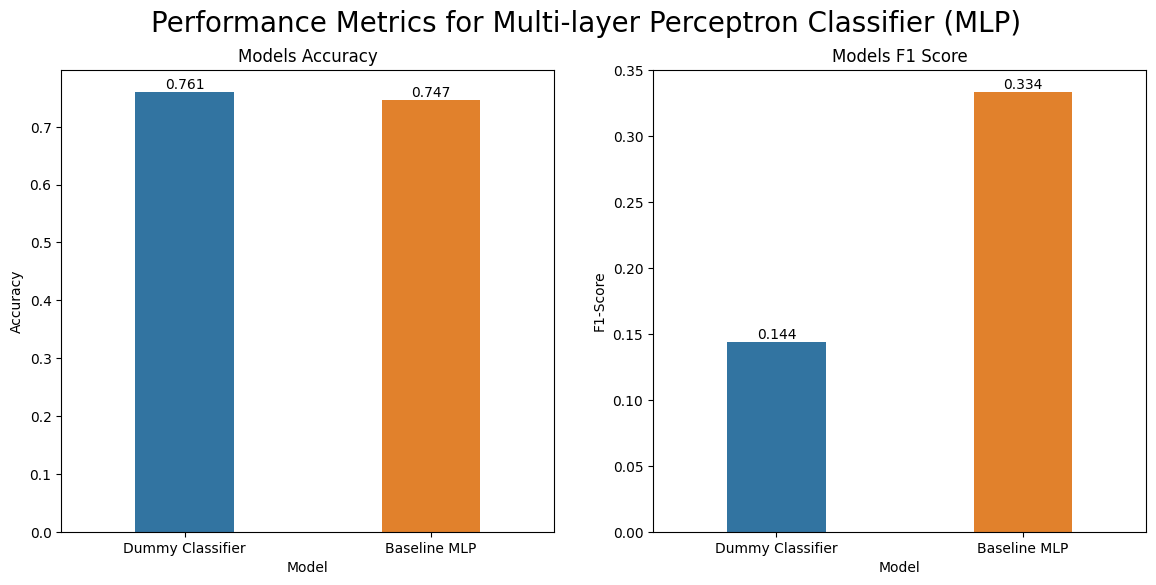

In [58]:
indices = [metrics.index[0], metrics.index[-1]]
fig, axes = plt.subplots(1, 2, figsize = (14,6))
ax = axes.ravel()

bars = sns.barplot(x=indices, y=metrics.loc[indices, 'Accuracy'], ax = ax[0], width=0.4)
ax[0].set_title('Models Accuracy')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

bars = sns.barplot(x=indices, y=metrics.loc[indices, 'F1_Score'], ax = ax[1], width=0.4)
ax[1].set_title('Models F1 Score')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1-Score')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

plt.suptitle('Performance Metrics for Multi-layer Perceptron Classifier (MLP)', fontsize = 20)
plt.show()

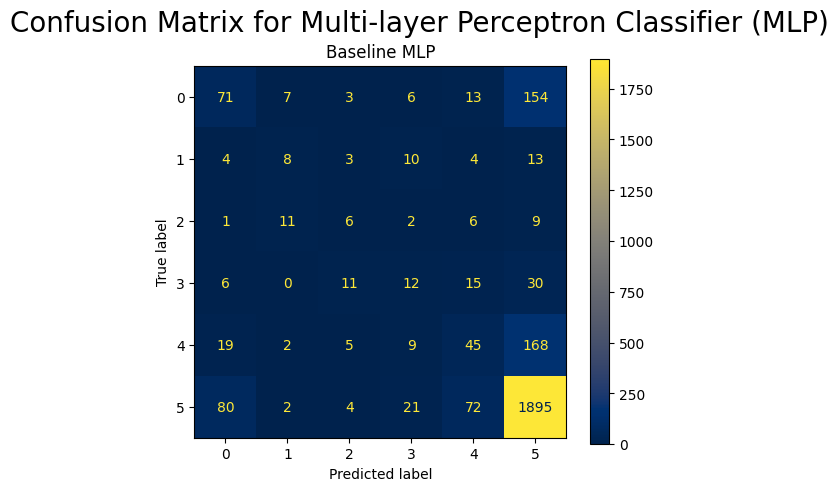

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 1, figsize=(6, 5))

# Confusion matrix for base_LR_pred
cm1 = confusion_matrix(y_val, base_MLP_pred, labels=sorted(y_val.unique()))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=sorted(y_val.unique()))
disp1.plot(ax=axes, cmap=plt.cm.cividis)
axes.set_title(f'{metrics.index[-1]}')

# cm2 = confusion_matrix(y_val, hpt_MLP_pred, labels=sorted(y_val.unique()))
# disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=sorted(y_val.unique()))
# disp2.plot(ax=axes[1], cmap=plt.cm.cividis, colorbar=False)
# axes[1].set_title(f'{metrics.index[-1]}')

plt.suptitle('Confusion Matrix for Multi-layer Perceptron Classifier (MLP)', fontsize = 20)
plt.show()

# **Models Comparision**

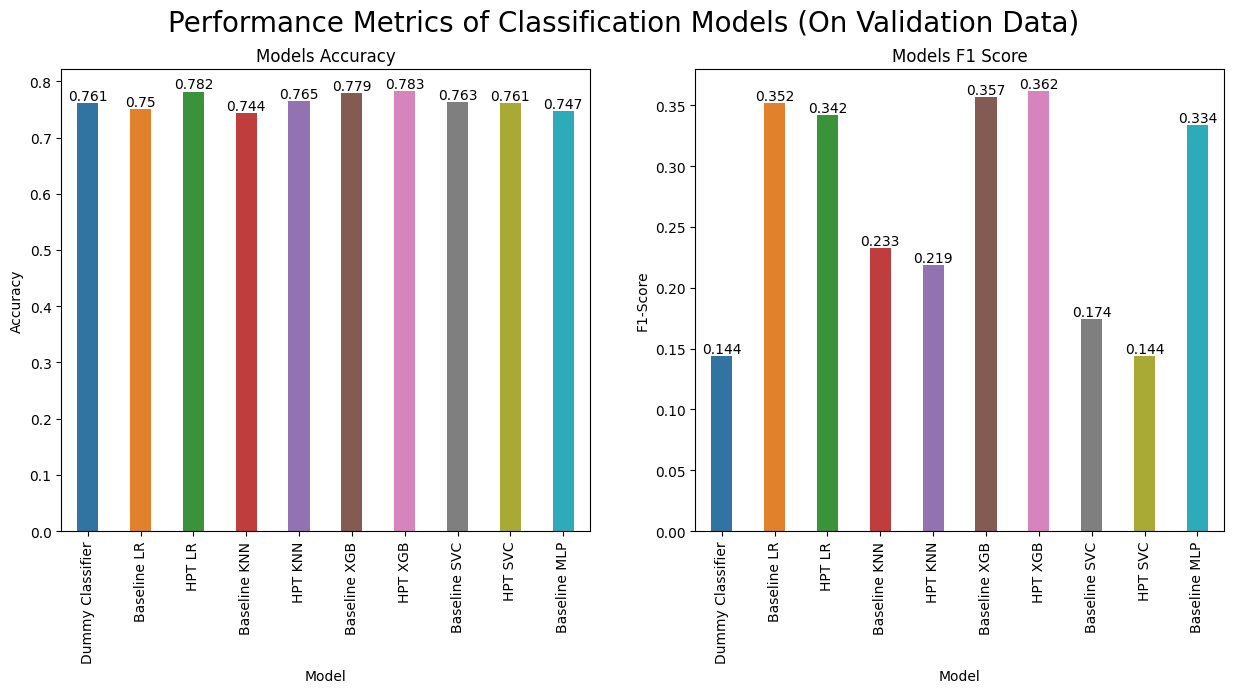

In [60]:
fig, axes = plt.subplots(1, 2, figsize = (15,6))
ax = axes.ravel()

bars = sns.barplot(x=metrics.index, y = metrics['Accuracy'], ax = ax[0], width=0.4)
ax[0].set_title('Models Accuracy')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')
ax[0].set_xticklabels(metrics.index, rotation=90)

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

bars = sns.barplot(x=metrics.index, y = metrics['F1_Score'], ax = ax[1], width=0.4)
ax[1].set_title('Models F1 Score')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1-Score')
ax[1].set_xticklabels(metrics.index, rotation=90)

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 3), ha='center', va='bottom')

plt.suptitle('Performance Metrics of Classification Models (On Validation Data)', fontsize = 20)
plt.show()

In [61]:
models = [hpt_LR, hpt_XGB, hpt_SVC, baseline_MLP]
models_name = [metrics.index[2], metrics.index[6], metrics.index[8], metrics.index[9]]

In [62]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, model_names, X_test, y_test, ratings, figsize=(15, 8)):
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=figsize)
    ax = axes.ravel()
    for i, rating in enumerate(ratings): 
        # Binarize the output
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))[:, rating]
        for j, model in enumerate(models):
            # Compute ROC curve and ROC area for each model
            y_score = model.predict_proba(X_test)[:, rating]
            fpr, tpr, _ = roc_curve(y_test_bin, y_score)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            ax[i].plot(fpr, tpr, label='%s ROC curve (area = %0.2f)' % (model_names[j], roc_auc))
            ax[i].plot([0, 1], [0, 1], 'k--')
            ax[i].set_xlim([0.0, 1.0])
            ax[i].set_ylim([0.0, 1.05])
            ax[i].set_xlabel('False Positive Rate')
            ax[i].set_ylabel('True Positive Rate')
            ax[i].set_title('Class - %d' % rating, fontsize = 15)
            ax[i].legend(loc="lower right")
    
    plt.suptitle('AUC-ROC of Different Models on each Class', fontsize = 20)
    plt.tight_layout()
    plt.show()

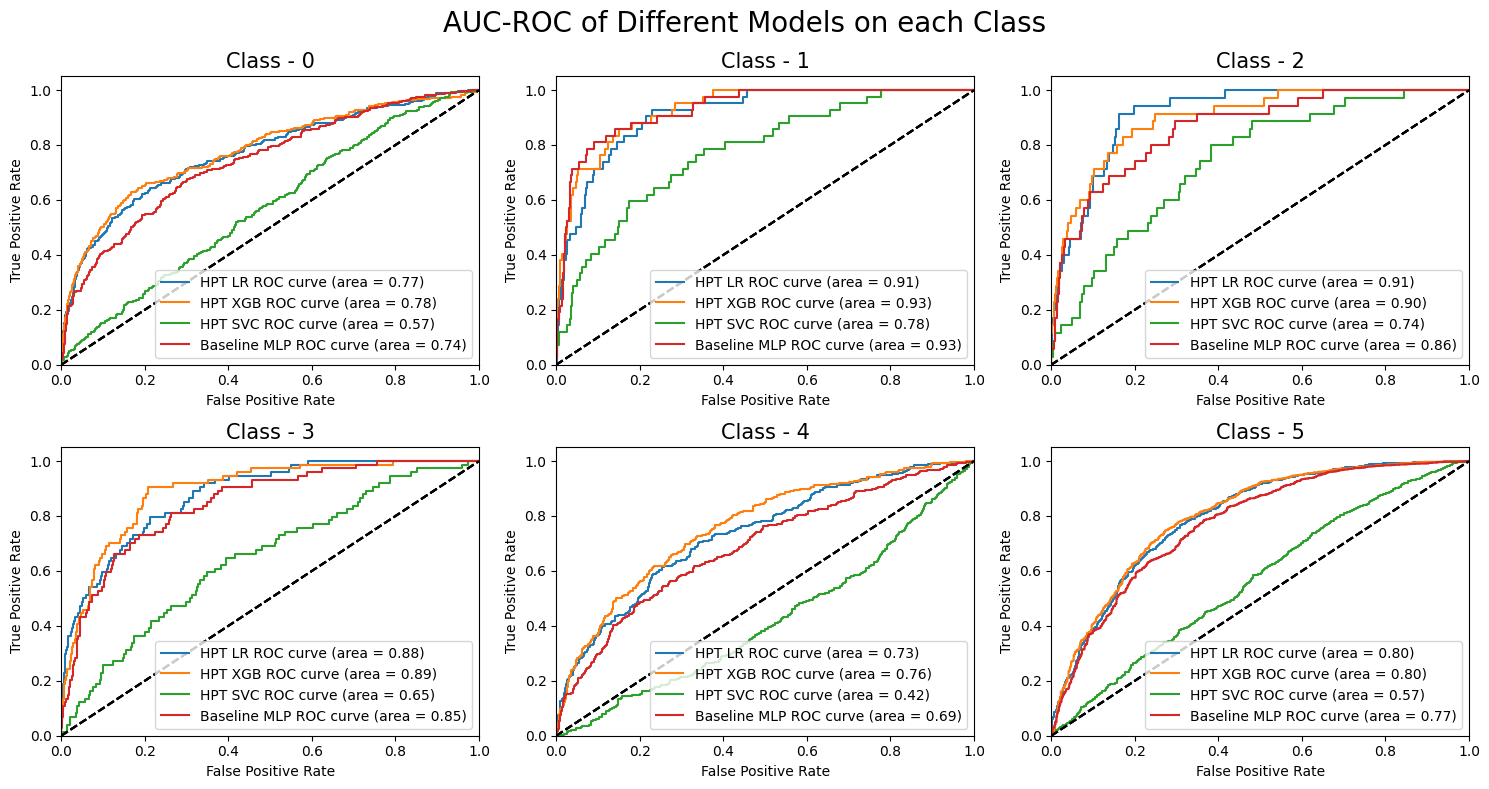

In [63]:
plot_roc_curves(models, models_name, X_val, y_val, [0,1,2,3,4,5])

In [64]:
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curves(models, model_names, X_test, y_test, ratings, figsize=(15, 8)):
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=figsize)
    ax = axes.ravel()
    for i, rating in enumerate(ratings): 
        # Binarize the output
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))[:, rating]
        for j, model in enumerate(models):
            # Compute Precision-Recall curve and area for each model
            y_score = model.predict_proba(X_test)[:, rating]
            precision, recall, _ = precision_recall_curve(y_test_bin, y_score)
            pr_auc = auc(recall, precision)

            # Plot Precision-Recall curve
            ax[i].plot(recall, precision, label='%s PR curve (area = %0.2f)' % (model_names[j], pr_auc))
            ax[i].set_xlim([0.0, 1.0])
            ax[i].set_ylim([0.0, 1.05])
            ax[i].set_xlabel('Recall')
            ax[i].set_ylabel('Precision')
            ax[i].set_title('Class - %d' % rating, fontsize = 15)
            ax[i].legend(loc="best")
    
    plt.suptitle('Precision-Recall AUC of Different Models on each Class', fontsize = 20)
    plt.tight_layout()
    plt.show()

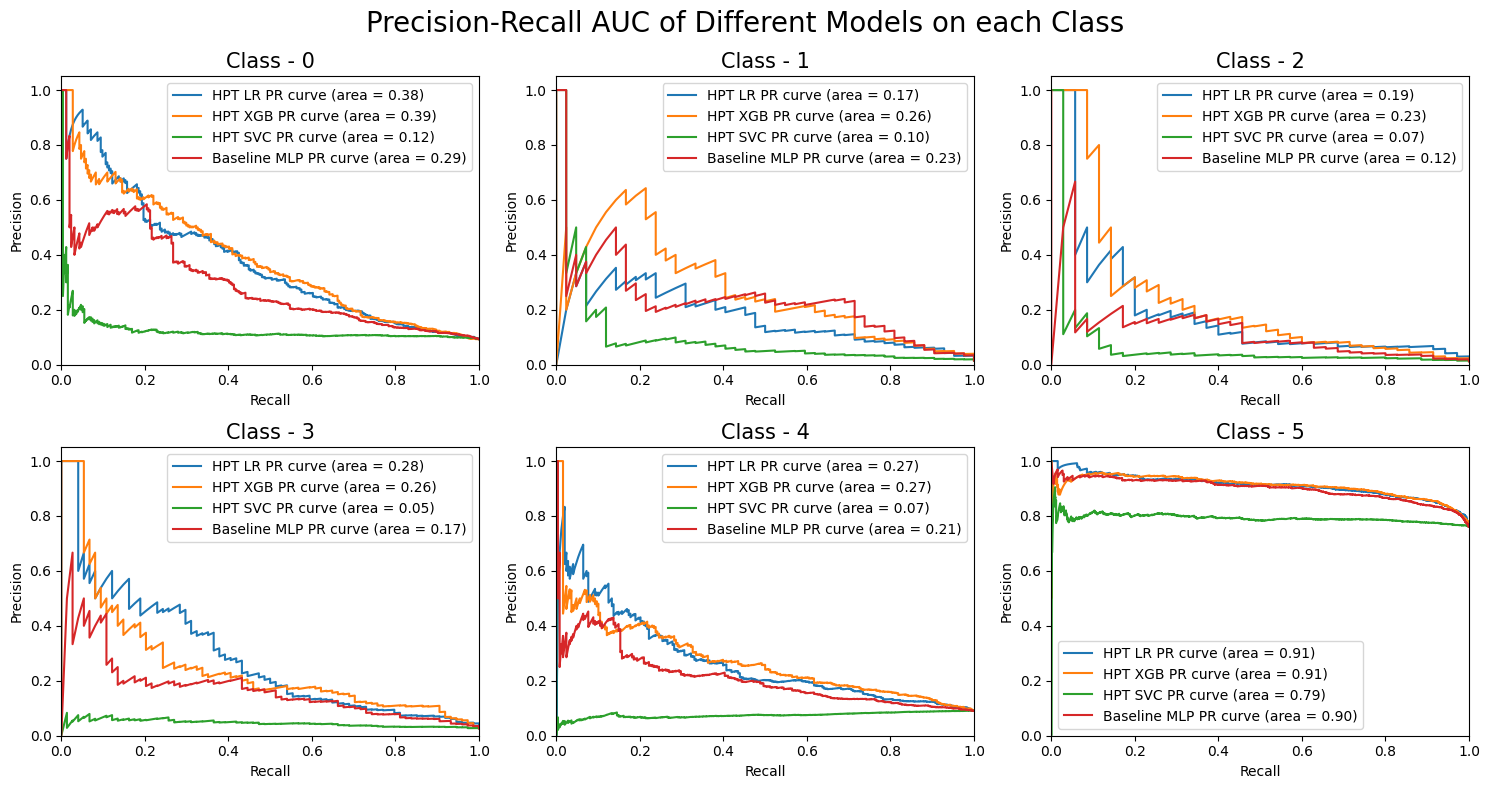

In [65]:
plot_precision_recall_curves(models, models_name, X_val, y_val, [0,1,2,3,4,5])

# **Ensembling Top Models**

In order to refine the classification capabilities of the top performing model, I used a Stacking Ensemble technique. This approach entails incorporating the predicted class probabilities from each model within the ensemble. Here, I will employ an averaging strategy to combine these probabilities, effectively mitigating the influence of the dominant majority class to a certain degree. Subsequently, the predicted class will be assigned based on the index corresponding to the highest average probability. This multifaceted approach leverages the strengths of multiple models while normalizing for potential class imbalances, ultimately aiming to achieve enhanced classification performance.

$$ \text{Average Probabilities} = \frac{Predicted\ Probability\ (HPT\ LR) + \cdot Predicted\ Probability\ (HPT\ XGB)}{2} $$

In [66]:
y_val_pred_proba_LR = hpt_LR.predict_proba(X_val)
y_val_pred_proba_XGB = hpt_XGB.predict_proba(X_val)

y_val_avg_proba = (y_val_pred_proba_LR + y_val_pred_proba_XGB)/2

y_val_pred_ensemble = np.argmax(y_val_avg_proba, axis=1)

print('Accuracy of Ensemble Model (on Validation Data)', '{}%'.format(round(accuracy_score(y_val, y_val_pred_ensemble)*100, 3)))

Accuracy of Ensemble Model (on Validation Data) 78.658%


## Handling Imbalance in Stacking Ensemble

To further mitigate the effects of data imbalance, I will explore the application of class-specific weights to the predicted probabilities. This strategy involves strategically penalizing the probabilities associated with the majority class, while concurrently boosting the probabilities of minority classes. To determine the optimal weighting scheme, I will employ an exhaustive search technique. This comprehensive approach ensures that the most effective class weights are identified, ultimately leading to a more robust classification model in the presence of imbalanced data.

$$ \text{Weighted Probabilities} = \text{Optimum_Weights} \cdot \left( \frac{Predicted\ Probability\ (HPT\ LR) + Predicted\ Probability\ (HPT\ XGB)}{2} \right) $$

In [67]:
# weight_range = np.arange(0.001, 2, 0.001)
# 
# optimal_weights = None
# optimal_acc = 0
# for w0 in np.arange(0.001, 2, 0.001):
#     for w1 in np.arange(0.001, 2, 0.001):
#         for w2 in np.arange(0.001, 2, 0.001):
#             for w3 in np.arange(0.001, 2, 0.001):
#                 for w4 in np.arange(0.001, 2, 0.001):
#                     for w5 in np.arange(0.001, 2, 0.001):
#                         weights_temp = np.array([w0, w1, w2, w3, w4, w5])
#                         y_pred_temp = np.argmax(y_val_avg_proba * weights_temp , axis = 1)
#                         acc_temp = accuracy_score(y_val, y_pred_temp)
#                         if optimal_acc < acc_temp:
#                             optimal_acc = acc_temp
#                             optimal_weights = weights_temp

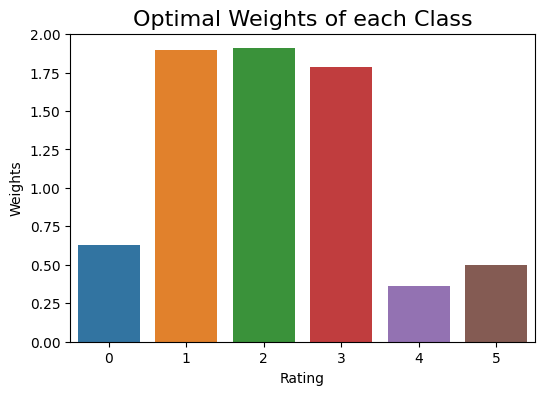

In [68]:
# Optimum weight found after running the above code cell
optimal_weights = np.array([0.631, 1.895, 1.907, 1.783, 0.36, 0.497])

# Plotting the weights for each class
plt.figure(figsize = (6,4))
sns.barplot(x = list(range(6)), y = optimal_weights)
plt.title('Optimal Weights of each Class', fontsize = 16)
plt.xlabel('Rating')
plt.ylabel('Weights')
plt.show()

It's great to see that the optimum weights are penalizing the majority class and boosting the minority class. This experiment goes well with my deductions.

In [69]:
y_val_pred_weighted_ensemble = np.argmax(y_val_avg_proba * optimal_weights, axis=1)

print('Accuracy of Weighted Ensemble Model (on Validation Data)', '{}%'.format(round(accuracy_score(y_val, y_val_pred_weighted_ensemble)*101, 3)))

Accuracy of Weighted Ensemble Model (on Validation Data) 79.556%


# Finalizing Model

We will now use the whole data provided for training the Weighted Stacking Ensemble of top performing models.

In [70]:
# Combining the modeling approach into single function
def Weighted_Ensemble(model_1, model_2, weights, X_train, y_train, X_test):
    model_1.fit(X_train, y_train)
    model_2.fit(X_train, y_train)
    
    y_prob_pred_m1 = model_1.predict_proba(X_test)
    y_prob_pred_m2 = model_2.predict_proba(X_test)
    
    y_avg_proba = (y_prob_pred_m1 + y_prob_pred_m2)/2
    y_weighted_proba = y_avg_proba * weights
    y_pred = np.argmax(y_weighted_proba, axis=1)
    
    return y_pred

In [71]:
# Getting predictions on test data
y_pred = Weighted_Ensemble(hpt_LR, hpt_XGB, optimal_weights, X, y, X_test)

# Final Submission

In [72]:
# Performing Submission
pred_df = pd.DataFrame()
pred_df['ID'] = [i + 1 for i in range(len(y_pred))]
pred_df['Rating'] = y_pred
pred_df.to_csv('submission.csv', index = False)

On submitting the test data predictions. We are able to obtain the accuracy of   **80.202 %**

# **Performance Analysis and Improvement Strategies for Recipe Rating Model**

We are only able to attain the probability of around 80% which is not good as per industry standards. We can not be certain about the relevence of the infrences we get from this model. The reason why we have such performance is stated below -

1. **Impact of Misleading Class Label ("0")**

- A key factor contributing to this limitation is the presence of a potentially misleading class label, denoted by "0". This label signifies users who have provided a review for a recipe but have not assigned a numerical rating.
- Upon further investigation, I have observed that a significant portion of these "0" class reviews are actually positive in sentiment and could potentially be classified as 4 or 5 ratings.
- This skews the model's training data and leads to misclassification of the "0" class as 4 or 5 during prediction using complex classifiers.
- Removing or re-categorizing the "0" class has the potential to significantly improve model accuracy.

2. **Data Imbalance**

- Another significant factor impacting model performance is data imbalance. Our current dataset exhibits an uneven distribution of ratings across classes.
- This imbalance can be observed in the PR-AUC curve, where the model struggles to accurately classify minority classes (less frequent ratings).
- Conversely, the model demonstrates adequate performance on the majority class (most frequent rating) as evidenced by the AUC-ROC curve.
- Addressing data imbalance through techniques such as oversampling or undersampling minority classes is likely to improve the model's ability to classify all ratings with greater accuracy.

3. **Data Quantity**

- The current volume of training data may be insufficient for the model to effectively learn the underlying patterns associated with each rating class.
- Increasing the available data for model training has the potential to significantly enhance its ability to distinguish between different rating categories and ultimately improve overall accuracy.

# **Additional Strategies for Enhancing Model Accuracy**

1. **Ensemble Learning with Weighted Stacking:**
I propose adding more models on the Weighted Stacking Ensemble. This approach leverages the predictions from multiple models to create a more robust final prediction. By combining the "wisdom of the crowd," ensemble learning can potentially improve overall model accuracy.

2. **Incorporating NLP Techniques and Text Embeddings:**
To further refine the information extracted from textual review data, I recommend investigating the application of Natural Language Processing (NLP) techniques. These techniques can help us extract more meaningful insights from the text, leading to better classification. Additionally, utilizing text embeddings instead of traditional bag-of-words approaches can significantly reduce the number of features in the dataset while preserving semantic relationships. This can improve model efficiency and potentially lead to better performance.

3. **Recategorization of "0" Rating Class:**
As previously discussed, the "0" class label presents a challenge due to its ambiguity. Recategorizing this class based on sentiment analysis or other heuristics  can significantly reduce the model's confusion and improve its ability to accurately classify positive reviews with missing numerical ratings.

4. **Hyperparameter Tuning for PR-AUC:**
Our current model evaluation relies primarily on accuracy score. However, given the data imbalance, focusing solely on accuracy might not be the most effective approach.  I propose exploring hyperparameter tuning specifically for the PR-AUC metric. This metric is better suited for the kind of imbalanced datasets we have and will help us optimize the model for better performance on minority rating classes.

<center><font size = 20>Thank You !</font></center>